# DATA 601 - Data Analysis and Visualization of Flight Delays in year 2019
***
### **Group 13:**

- #### James Ding
- #### Misha Salykova

### Introduction: 

In the intricate ecosystem of the aviation industry, punctuality is not just a convenience but a cornerstone of customer satisfaction, loyalty, operational efficiency, cost management, and competitive advantage. Flight delays, however, pose a significant challenge, affecting safety, compliance, and strategic planning (Ashmith, 2023). This project aims to dissect the 2019 flight delay data through various lenses, identifying the root causes, patterns and trends. Our analysis is geared towards fostering a deeper understanding of delay dynamics and contributing to the enhancement of the overall efficiency and satisfaction within the aviation sector by providing descriptive analysis and data visualizations to convey them to stakeholders for better business decisions. 

***
### GUIDING QUESTIONS
***
#### 1. How do delays vary by time of day, day of the week, or season? 
   - Understanding temporal patterns to anticipate and manage delays better. 
#### 2. Are certain airlines more prone to flight delays? 
   - Comparing airline performance to highlight areas for operational improvement. 
#### 3. Are certain airports or routes more prone to delay? 
   - Analyzing geographical and infrastructural factors affecting punctuality.
#### 4. What are the major factors causing flight delays? 
   - Identifying various causes of delay to devise counter measurement. 
#### 5. Do airtime and distance affect flight delays? 
   - Examining if longer flights have different delay patterns compared to shorter ones.

### Dataset: 
***
The 2019-2023 flight delays and cancellations dataset, available on Kaggle, will serve as the primary data source for this analysis. The data is publicly available and is permitted for use under educational terms. The original source is the US Department of Transportation (DOT), Bureau of Transportation Statistics. It was retrieved from the US Department of Transportation (DOT) “On-Time: Reporting   Carrier On-Time Performance” report. The dataset covers the period from August 2019 - August 2023. It contains detailed records, including flight dates and routes, carrier information, departure and arrival times, delay durations and delay and cancellation reasons. The raw dataset has 32 columns with variables and 1,048,576 unique rows with values. The dataset is structured in CSV format and requires meticulous cleaning, transformation, and filtering to ensure the accuracy and relevance of the analysis. 

Note: The focus of our analysis will the be year 2019 data, in order to correctly visualize the population statistics before the covid pandemic during regular operations without restrictions. 

### Data Wrangling:
***
#### Step 1.1: Import csv file

In [5]:
#Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [82]:
df_delays = pd.read_csv('flights_sample_3m.csv')
print("Head of the dataset:")
print(df_delays.head(3))
print("\nTail of the dataset:")
print(df_delays.tail(3))

Head of the dataset:
      FL_DATE                 AIRLINE                 AIRLINE_DOT  \
0  2019-01-01    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
1  2019-01-01  Southwest Airlines Co.  Southwest Airlines Co.: WN   
2  2019-01-01   United Air Lines Inc.   United Air Lines Inc.: UA   

  AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN     ORIGIN_CITY DEST  \
0           DL     19790        345    ATL     Atlanta, GA  DAB   
1           WN     19393       1780    BHM  Birmingham, AL  MDW   
2           UA     19977        438    IAH     Houston, TX  SEA   

           DEST_CITY  ...  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  AIR_TIME  \
0  Daytona Beach, FL  ...         0              76.0          69.0      54.0   
1        Chicago, IL  ...         0             105.0           NaN       NaN   
2        Seattle, WA  ...         0             294.0         281.0     251.0   

   DISTANCE  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
0       366                NaN          

***
### Step 1.2: Data Cleaning 

##### -We want to look at only year 2019 to generate insights on flight delays before covid restrictions took place to represent population parameters before the impact of covid 
##### -We  want to convert FL_DATE column that represent the "flight date" to datetime format
##### -To ensure consistency and accuracy of formatting in  column 'CRS_DEP_TIME' (that represent "scheduled departure time") , we will convert the values into 4-digit values by adding leading zeros, we will use the str.zfill() method in pandas. We then want to convert the values into datetime format

In [28]:
# to convert FL_DATE column to datetime format
df_delays = pd.read_csv('flights_sample_3m.csv')
df_delays['FL_DATE'] = pd.to_datetime(df_delays['FL_DATE'])

# to filter the DataFrame to include only data from the year 2019
df_delays_2019 = df_delays[df_delays['FL_DATE'].dt.year == 2019].copy()

# to convert 'CRS_DEP_TIME' to string and then use zfill to add leading zeros
df_delays_2019['CRS_DEP_TIME'] = df_delays_2019['CRS_DEP_TIME'].astype(str).str.zfill(4)

# to convert CRS_DEP_TIME column to datetime format if not already done
df_delays_2019['CRS_DEP_TIME'] = pd.to_datetime(df_delays_2019['CRS_DEP_TIME'], format='%H%M')

# to remove missing values in DEP_DELAY column
df_delays_2019 = df_delays_2019.dropna(subset=['DEP_DELAY'])

***
### GUIDING QUESTION 1: How do delays vary by time of day, day of the week, or season? 
***
#### Understanding temporal patterns of flight delays is crucial for several reasons:
   - **Operational Efficiency:** Airlines and airports can use temporal patterns to anticipate and mitigate delays. By identifying peak times of delays, they can allocate resources more effectively, such as increasing staffing during busy periods or optimizing flight schedules.
   - **Customer Satisfaction:** Anticipating delays during peak travel times enables airlines to communicate effectively with passengers, manage expectations, and provide alternative options, ultimately improving overall customer satisfaction.
   - **Cost Management:** Understanding temporal patterns allows airlines to minimize costs associated with delays, such as compensation for passengers and overtime pay for staff, by implementing targeted strategies during high-delay periods.
   - **Safety and Compliance:** By analyzing temporal patterns, airlines and air traffic control agencies can anticipate and manage congestion during peak travel times, reducing the risk of safety incidents and ensuring compliance with regulatory requirements.
   - **Strategic Planning:** Temporal insights inform long-term strategic decisions, including route planning, fleet management, and infrastructure investments, enhancing operational performance and competitiveness within the aviation industry.
***

#### Analysis & Data Visualization

To understand temporal patterns of flights delays, we will complete analysis of data in our dataset for each of the following and share findings. 

1.	Hour of the Day
2.	Day of the Week
3.	Month of the Year 


#### 1.1.	How do delays vary by time of day (hour of the day) ?

- To answer this question we will visualize delays by time of day using a stacked bar chart to see the total counts of flights per hour of the day and proportions of on-time and delayed flights in 2019. 
- We will also summarize the Percentages of On-Time and Delayed Flights per Hour of the Day using a summary table 
- We will display average Delay Time by Hour of the Day (2019) using a scatterplot to see if there is significant difference in average delay time depending on the time of the day. 


In [29]:
#data cleanings
# to convert FL_DATE column to datetime format
df_delays = pd.read_csv('flights_sample_3m.csv')
df_delays['FL_DATE'] = pd.to_datetime(df_delays['FL_DATE'])

# to filter the DataFrame to include only data from the year 2019
df_delays_2019 = df_delays[df_delays['FL_DATE'].dt.year == 2019].copy()

# to convert 'CRS_DEP_TIME' to string and then use zfill to add leading zeros
df_delays_2019['CRS_DEP_TIME'] = df_delays_2019['CRS_DEP_TIME'].astype(str).str.zfill(4)

# to convert CRS_DEP_TIME column to datetime format if not already done
df_delays_2019['CRS_DEP_TIME'] = pd.to_datetime(df_delays_2019['CRS_DEP_TIME'], format='%H%M')

# to remove missing values in DEP_DELAY column
df_delays_2019 = df_delays_2019.dropna(subset=['DEP_DELAY'])

#Q1

# To extract hour from 'CRS_DEP_TIME' column
df_delays_2019['CRS_DEP_HOUR'] = df_delays_2019['CRS_DEP_TIME'].dt.hour

# to check data type of the 'CRS_DEP_HOUR' column
print(df_delays_2019['CRS_DEP_HOUR'].dtype)

# to check unique values in the 'CRS_DEP_HOUR' column
unique_hours = df_delays_2019['CRS_DEP_HOUR'].unique()
print(unique_hours)

# to check if all hours from 0 to 23 are present
expected_hours = set(range(24))
if set(unique_hours) == expected_hours:
    print("All hours from 0 to 23 are present.")
else:
    print("Not all hours from 0 to 23 are present.")

# 'CRS_DEP_HOUR' contains valid hour values ranging from 0 to 23
# 'CRS_DEP_HOUR' is of integer type

int32
[ 9 11 17 14 18  8 10  6 12 19 16  5 15 20  7 13 21  2 22 23  1  0  3  4]
All hours from 0 to 23 are present.


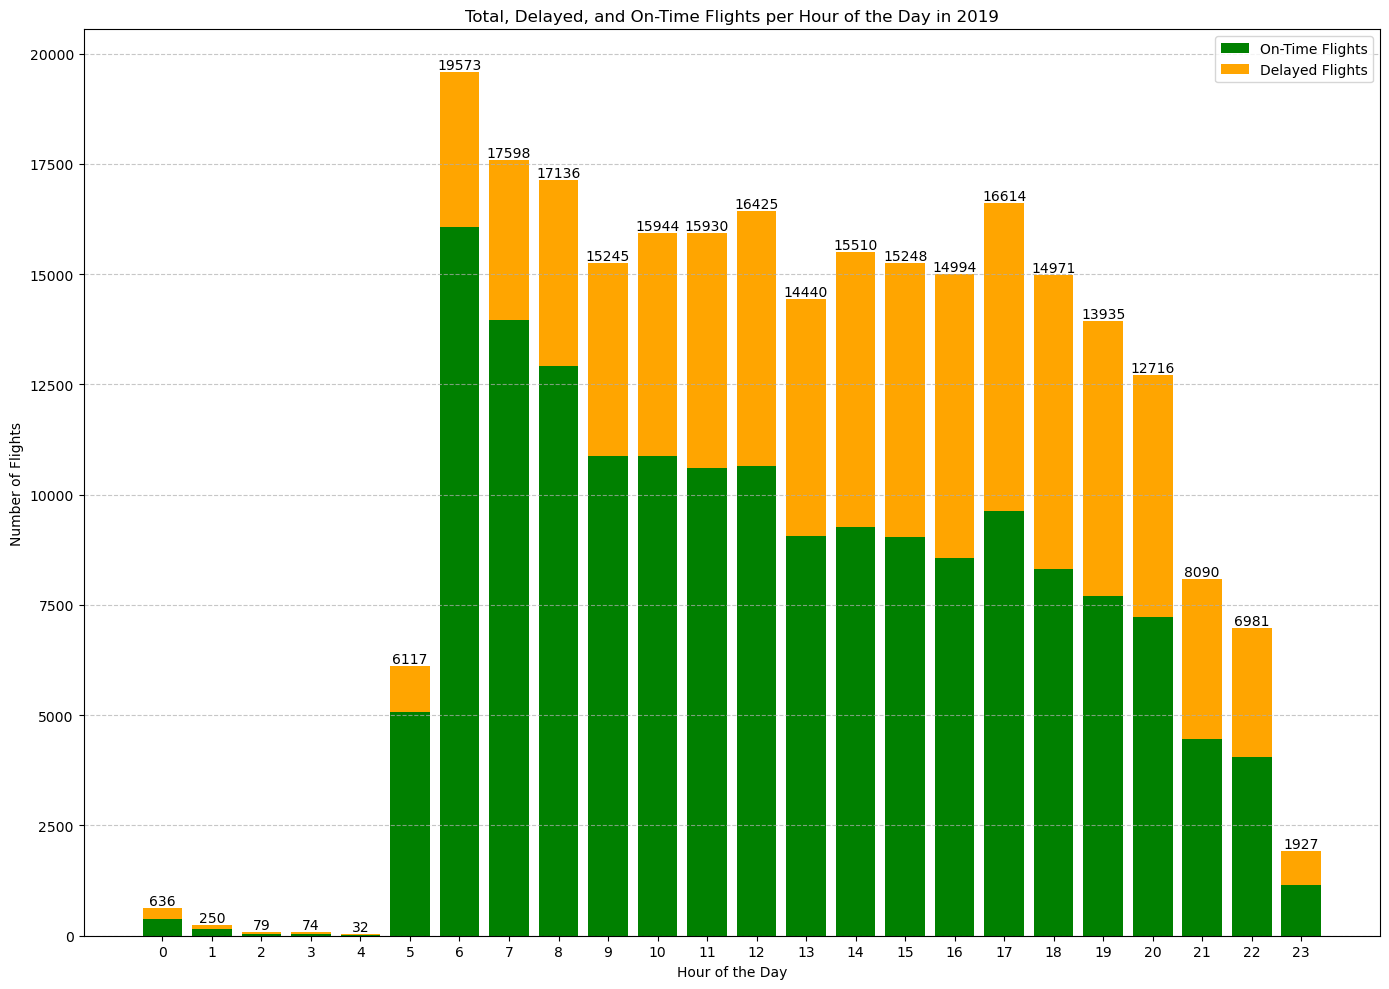

,Percentage On-Time Flights,Percentage Delayed Flights
Hour of the Day,,
0,60.22%,39.78%
1,62.40%,37.60%
2,56.96%,43.04%
3,55.41%,44.59%
4,59.38%,40.62%
5,83.01%,16.99%
6,82.11%,17.89%
7,79.31%,20.69%
8,75.43%,24.57%


In [116]:
# to calculate counts of delayed flights per hour
delayed_flights_per_hour = df_delays_2019[df_delays_2019['DEP_DELAY'] > 0].groupby('CRS_DEP_HOUR').size()

# to calculate counts of on-time flights per hour
on_time_flights_per_hour = df_delays_2019[df_delays_2019['DEP_DELAY'] <= 0].groupby('CRS_DEP_HOUR').size()

# to create a stacked bar graph showing the total number of flights, delayed flights, and on-time flights per hour of the day
plt.figure(figsize=(14, 10))

# to stack delayed flights on top of on-time flights
plt.bar(on_time_flights_per_hour.index, on_time_flights_per_hour.values, color='green', label='On-Time Flights')
plt.bar(delayed_flights_per_hour.index, delayed_flights_per_hour.values, color='orange', label='Delayed Flights', bottom=on_time_flights_per_hour.values)

# to add legend above the bars
plt.legend()

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Flights')
plt.title('Total, Delayed, and On-Time Flights per Hour of the Day in 2019')

plt.xticks(range(24)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# to add counts as text labels on the bars
for i in range(len(on_time_flights_per_hour)):
    plt.text(on_time_flights_per_hour.index[i], on_time_flights_per_hour.values[i] + delayed_flights_per_hour.values[i],
             str(on_time_flights_per_hour.values[i] + delayed_flights_per_hour.values[i]),
             ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


# Table to display PERCENTAGE OF DELAYED FLIGHTS 

# to calculate total flights per hour
total_flights_per_hour = on_time_flights_per_hour + delayed_flights_per_hour

# to calculate percentage of on-time flights per hour
percentage_on_time = (on_time_flights_per_hour / total_flights_per_hour) * 100

# to calculate percentage of delayed flights per hour
percentage_delayed = (delayed_flights_per_hour / total_flights_per_hour) * 100

# to combine the series into a DataFrame for easier visualization
percentage_df = pd.DataFrame({
    'Hour of the Day': range(24),
    'Percentage On-Time Flights': percentage_on_time.values,
    'Percentage Delayed Flights': percentage_delayed.values
})

# to set 'Hour of the Day' as index
percentage_df.set_index('Hour of the Day', inplace=True)

# to apply styling to the DataFrame
styled_percentage_df = percentage_df.style \
    .background_gradient(cmap='coolwarm') \
    .format("{:.2f}%") \
    .set_caption("Percentage of On-Time and Delayed Flights per Hour of the Day")

# to display the styled DataFrame
styled_percentage_df



#### Findings for:  1.1	How do delays vary by time of day (hour of the day)? 

Visualizing delays by time of day using a stacked bar chart allowed us to understand the following aspects:

- **Peak Hours of Delay**: We’ve identified which hours of the day experience the highest number of delays. From the stacked bar chart above we can see that the time of the day with the highest number of flights and highest number of delays is from 6:00 am to 8:00 pm. 

We also looked at the percentage of total delays (Table 1) to better understand which times of the day are more prone to delays.

- **Early Morning Hours (0:00 to 4:00):** despite the low number of total flights have a high percentage of delayed flights (around 41% on average). 

- **Morning Rush Hours (5:00 to 9:00):** on the contrary to early morning hours, we can see that despite the drastic increase in the number of total flights starting at 5:00 am, morning rush hours from 5:00 am to 9:00 am have the lowest percentage of delayed flights (around 22% on average) throughout the day. The time of the day with the highest number of total flights is 6:00 am with 19573 total flights, however 6:00 also has the second lowest percentage of delayed flights per hour 17.89%.
  
- **Midday to Afternoon (10:00 to 15:00):** As the day progresses, the percentage of delayed flights gradually increases, peaking around 15:00 (40.73%). 

- **Evening Hours (16:00 to 23:00):** The percentage of delayed flights increases further and remains relatively high (around 42.5 % on average) during the evening hours, peaking at 18:00 (44.44%).

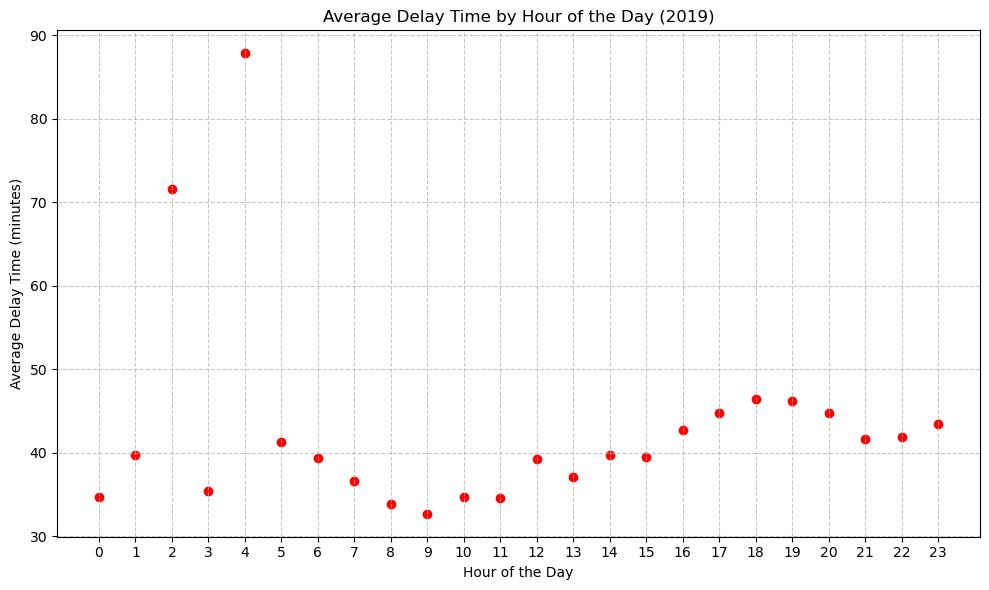

In [31]:
# to filter the DataFrame to include only rows where departure delay is greater than 0
df_positive_delay = df_delays_2019[df_delays_2019['DEP_DELAY'] > 0]

# to calculate average delay time for each hour of the day where delay is greater than 0
average_delay_per_hour = df_positive_delay.groupby(df_positive_delay['CRS_DEP_TIME'].dt.hour)['DEP_DELAY'].mean()

# to create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_delay_per_hour.index, average_delay_per_hour.values, color='red')

# to add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Average Delay Time (minutes)')
plt.title('Average Delay Time by Hour of the Day (2019)')

# to show plot
plt.xticks(range(0, 24))  # to adjust x-axis ticks to show hours of the day
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Findings for:  1.1	How do delays vary by time of day (hour of the day)? 

Based on the "Average Delay Time by Hour of the Day (2019)" scatter plot:

- **Early Morning Hours (0:00 to 4:00):** early morning hours at around 2:00 and 4:00 showed the highest average delay time (minutes) 

- **Morning Rush Hours (5:00 to 9:00):** average delay time starts to decrease gradually throughout the morning rush hours, despite the highest number of flights 
  
- **Midday to Afternoon (10:00 to 15:00):** as the day progresses, average delay time starts to increase again during midday to afternoon  

- **Evening Hours (16:00 to 23:00):** average delay time slightly increases during evening hours, however no significant increase 

Overall, average delay time (minutes) stays relatively constant at around 30-50 minutes throughout the entire day, only peaking during certain early morning hours. 


***
#### 1.2. How do delays vary by Day of the Week?

- To answer this question, we will visualize delays by the day of the week using a stacked bar chart to see the total counts of flights per day of the week and proportions of on-time and delayed flights in 2019.
  
- We will also summarize the Percentages of On-Time and Delayed Flights per Day of the Week using a summary table.
  
- Additionally, we will display the average Delay Time by Day of the Week (2019) using a scatterplot to see if there is a significant difference in average delay time depending on the day of the week.

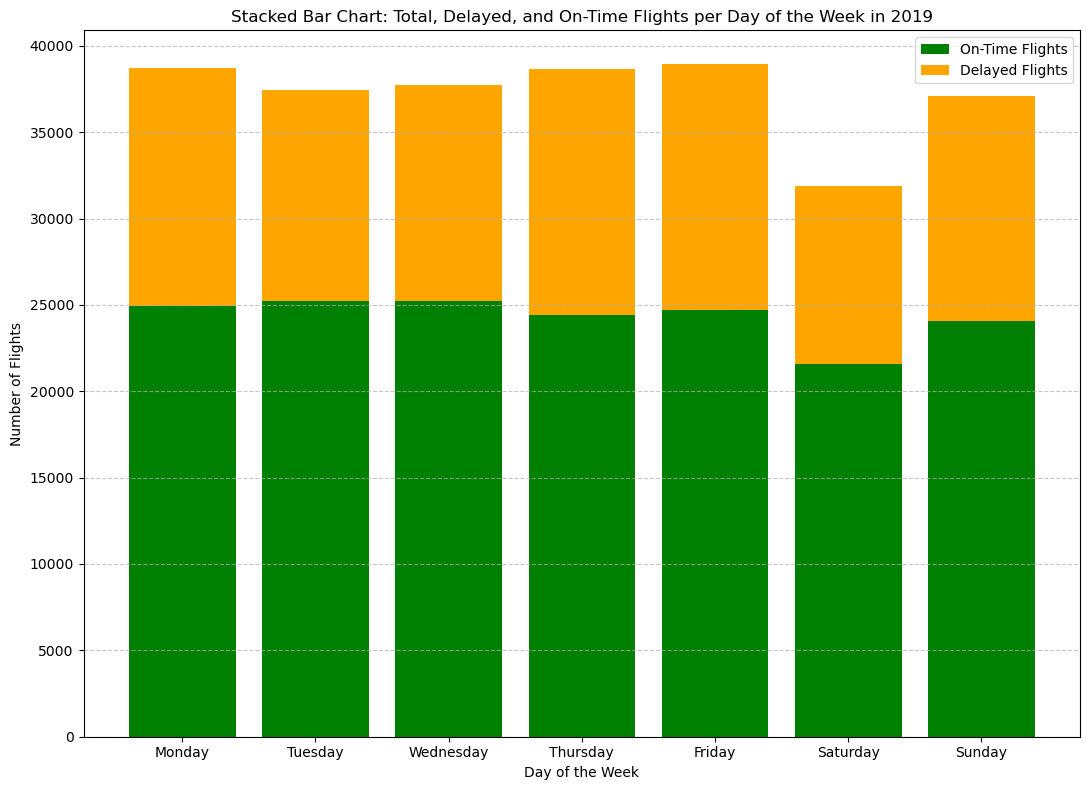

,Percentage On-Time Flights,Percentage Delayed Flights
Day of the Week,,
Monday,64.36%,35.64%
Tuesday,67.39%,32.61%
Wednesday,66.87%,33.13%
Thursday,63.22%,36.78%
Friday,63.44%,36.56%
Saturday,67.70%,32.30%
Sunday,64.87%,35.13%


In [80]:
# to calculate day of the week
df_delays_2019.loc[:, 'DAY_OF_WEEK'] = df_delays_2019['FL_DATE'].dt.dayofweek

# to calculate counts of delayed flights per weekday
delayed_flights_per_weekday = df_delays_2019[df_delays_2019['DEP_DELAY'] > 0].groupby('DAY_OF_WEEK').size()

# to calculate counts of on-time flights per weekday
on_time_flights_per_weekday = df_delays_2019[df_delays_2019['DEP_DELAY'] <= 0].groupby('DAY_OF_WEEK').size()

# to create a stacked bar graph showing the total number of flights, delayed flights, and on-time flights per day of the week
plt.figure(figsize=(11, 8))

# to stack delayed flights on top of on-time flights
plt.bar(on_time_flights_per_weekday.index, on_time_flights_per_weekday.values, color='green', label='On-Time Flights')
plt.bar(delayed_flights_per_weekday.index, delayed_flights_per_weekday.values, color='orange', label='Delayed Flights', bottom=on_time_flights_per_weekday.values)

# to add legend above the bars
plt.legend()

plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.title('Stacked Bar Chart: Total, Delayed, and On-Time Flights per Day of the Week in 2019')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Table to display PERCENTAGE OF DELAYED FLIGHTS 
# to calculate total flights per weekday
total_flights_per_weekday = on_time_flights_per_weekday + delayed_flights_per_weekday

# to calculate percentage of on-time flights per weekday
percentage_on_time_weekday = (on_time_flights_per_weekday / total_flights_per_weekday) * 100

# to calculate percentage of delayed flights per weekday
percentage_delayed_weekday = (delayed_flights_per_weekday / total_flights_per_weekday) * 100

# to combine the series into a DataFrame for easier visualization
percentage_weekday_df = pd.DataFrame({
    'Day of the Week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Percentage On-Time Flights': percentage_on_time_weekday.values,
    'Percentage Delayed Flights': percentage_delayed_weekday.values
})

# to set 'Day of the Week' as index
percentage_weekday_df.set_index('Day of the Week', inplace=True)

# to apply styling to the DataFrame
styled_percentage_weekday_df = percentage_weekday_df.style \
    .background_gradient(cmap='coolwarm') \
    .format("{:.2f}%") \
    .set_caption("Percentage of On-Time and Delayed Flights per Day of the Week")

# to display the styled DataFrame
styled_percentage_weekday_df

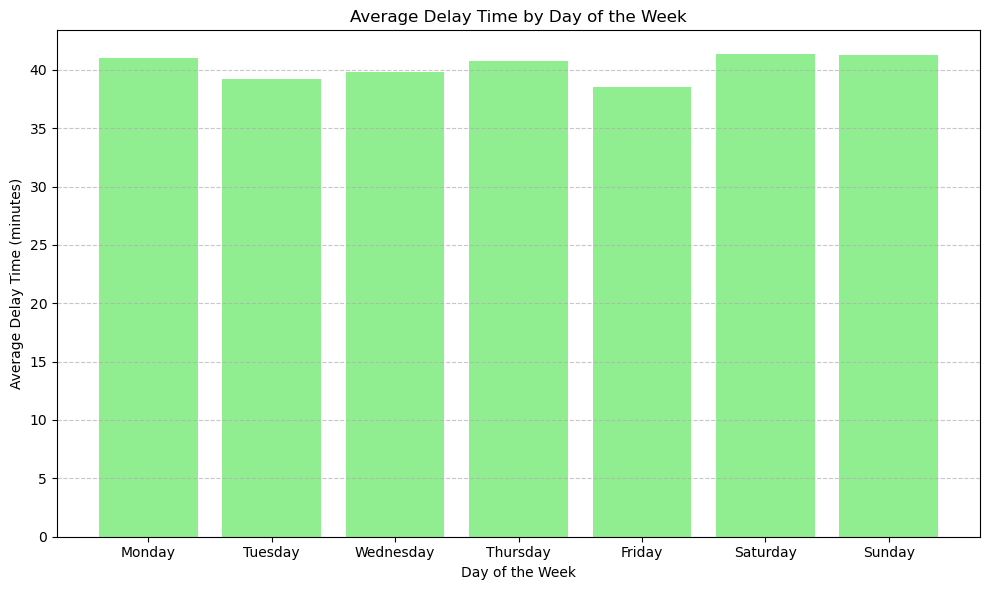

In [39]:
# to filter the DataFrame to include only delays greater than 0
positive_delay_df = df_delays_2019[df_delays_2019['DEP_DELAY'] > 0]

# to calculate the average delay time for each day of the week
average_delay_per_day = positive_delay_df.groupby(positive_delay_df['FL_DATE'].dt.dayofweek)['DEP_DELAY'].mean()

# to define the names of the days of the week for labeling
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# to create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(days_of_week, average_delay_per_day, color='lightgreen')

# to add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay Time (minutes)')
plt.title('Average Delay Time by Day of the Week')

# to show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Findings for:  1.2. How do delays vary by Day of the Week?

Based on the bar chart "Total, Delayed, and On-Time Flights per Day of the Week in 2019" and the summary table of "Percentages of On-Time and Delayed Flights per Day of the Week" we can see that there seems to be no significant difference between the percentage of delayed flights throughout the week. All days of the weeks have similar percentages of delayed flights (32-36%). Also based on the "Average Delay Time by Day of the Week" we can see that the average delay time (minutes) is also comparable for all days of the week at around 40 minutes. 

***
#### 1.3 How do delays vary by Month of the Year?
- To answer this question, we will visualize delays by the month of the year using a stacked bar chart to see the total counts of flights per month and proportions of on-time and delayed flights in 2019.

- We will also summarize the Percentages of On-Time and Delayed Flights per Month of the Year using a summary table.

- Additionally, we will display the average Delay Time by Month of the Year (2019) using a scatterplot to see if there is a significant difference in average delay time depending on the month of the year.

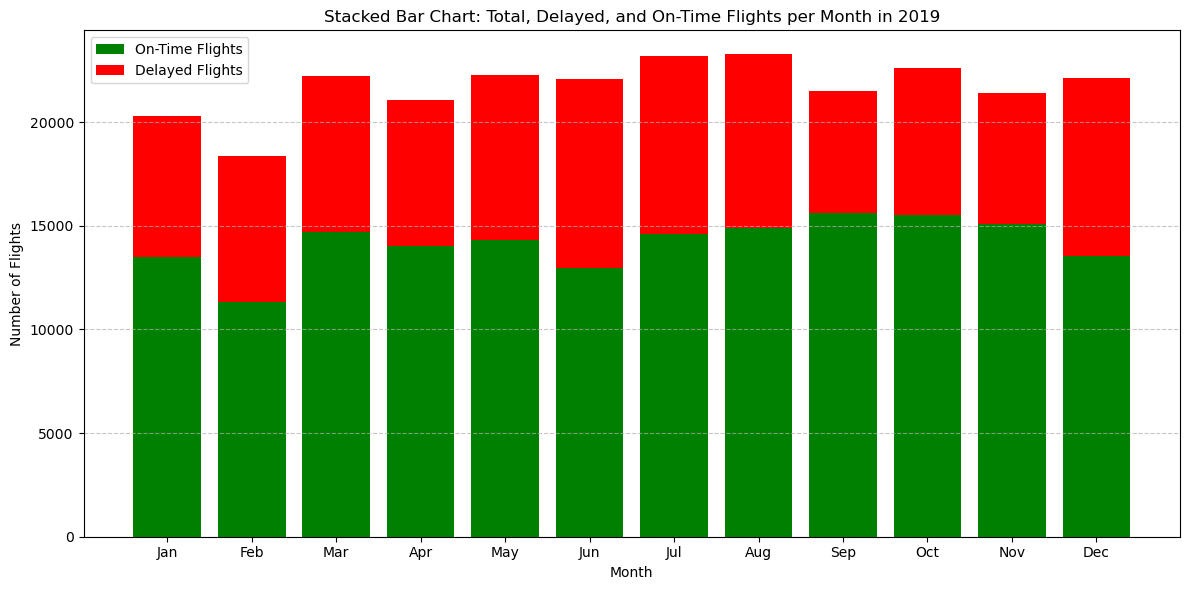

,Percentage On-Time Flights,Percentage Delayed Flights
Month,,
1,66.63%,33.37%
2,61.53%,38.47%
3,66.16%,33.84%
4,66.69%,33.31%
5,64.28%,35.72%
6,58.75%,41.25%
7,63.09%,36.91%
8,64.01%,35.99%
9,72.56%,27.44%


In [81]:
# to extract month from FL_DATE
df_delays_2019['Month'] = df_delays_2019['FL_DATE'].dt.month

# to calculate delayed flights per month
delayed_flights_per_month = df_delays_2019[df_delays_2019['DEP_DELAY'] > 0].groupby('Month').size()

# to calculate on-time flights per month
on_time_flights_per_month = df_delays_2019[df_delays_2019['DEP_DELAY'] <= 0].groupby('Month').size()

# to create stacked bar graphs for total, delayed, and on-time flights per month
plt.figure(figsize=(12, 6))

# to stack delayed flights on top of on-time flights
plt.bar(on_time_flights_per_month.index, on_time_flights_per_month.values, color='green', label='On-Time Flights')
plt.bar(delayed_flights_per_month.index, delayed_flights_per_month.values, color='red', label='Delayed Flights', bottom=on_time_flights_per_month.values)

# to sdd labels and title
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Stacked Bar Chart: Total, Delayed, and On-Time Flights per Month in 2019')

# to set the x-axis ticks to be the name of the months
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# add legend
plt.legend()

# show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Table to display PERCENTAGE OF DELAYED FLIGHTS 
# to calculate total flights per month
total_flights_per_month = on_time_flights_per_month + delayed_flights_per_month

# to calculate percentage of on-time flights per month
percentage_on_time_month = (on_time_flights_per_month / total_flights_per_month) * 100

# to calculate percentage of delayed flights per month
percentage_delayed_month = (delayed_flights_per_month / total_flights_per_month) * 100

# to combine the series into a DataFrame for easier visualization
percentage_month_df = pd.DataFrame({
    'Month': range(1, 13),
    'Percentage On-Time Flights': percentage_on_time_month.values,
    'Percentage Delayed Flights': percentage_delayed_month.values
})

# to set 'Month' as index
percentage_month_df.set_index('Month', inplace=True)

# to apply styling to the DataFrame
styled_percentage_month_df = percentage_month_df.style \
    .background_gradient(cmap='coolwarm') \
    .format("{:.2f}%") \
    .set_caption("Percentage of On-Time and Delayed Flights per Month")

styled_percentage_month_df


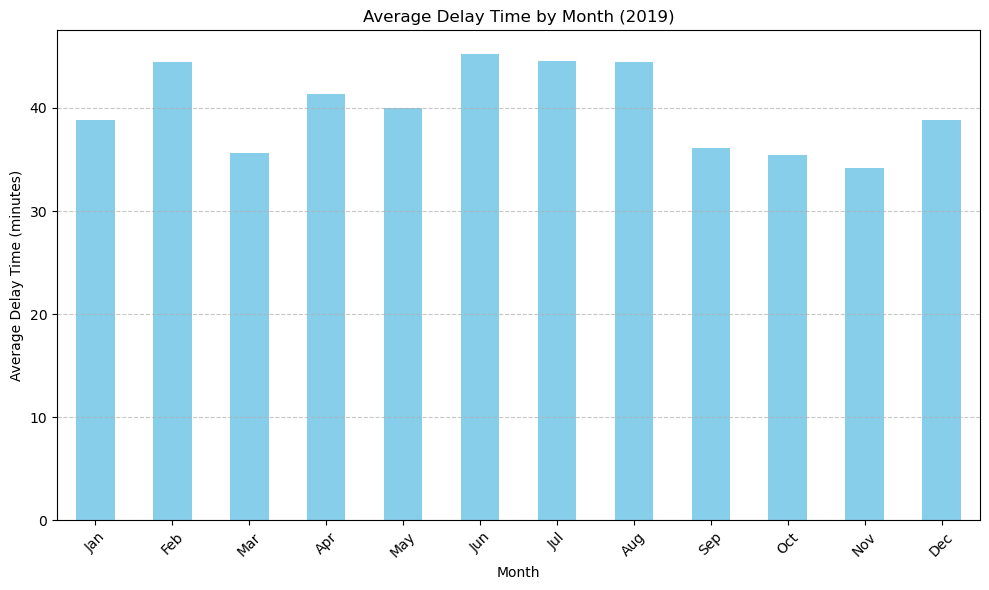

In [49]:
# to filter the DataFrame to include only delays greater than 0
positive_delay_df = df_delays_2019[df_delays_2019['DEP_DELAY'] > 0].copy()

# to extract the month from FL_DATE using .dt.month
positive_delay_df.loc[:, 'Month'] = positive_delay_df['FL_DATE'].dt.month

# to calculate the average delay time for each month
average_delay_per_month = positive_delay_df.groupby('Month')['DEP_DELAY'].mean()

# to create bar graph
plt.figure(figsize=(10, 6))
average_delay_per_month.plot(kind='bar', color='skyblue')

# to add labels and title
plt.xlabel('Month')
plt.ylabel('Average Delay Time (minutes)')
plt.title('Average Delay Time by Month (2019)')

# to set the x-axis ticks to be the name of the months
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# to show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Findings for:  1.3	How do delays vary by Month of the Year?

We can draw the following conclusions regarding how delays vary by month of the year:

**Visualization with Stacked Bar Chart & Summary Table:**

 
- We observe variations in the percentages of on-time and delayed flights across different months of the year.
  
-	Overall, we can see that all months have comparable numbers of total flights, on-time flights, and delayed flights.
  
-	Some months, particularly in Fall, have a slightly higher overall percentage of on-time flights (Sep 72.56%, Oct 68.67%, Nov 70.41%) & lower percentage of delayed flights (Sep 27.44%, Oct 31.33%, Nov 29.59%)
  
-	While some months have a slightly higher percentage of delayed flights (Feb 38.47%, June 41.25%, Dec 38.76%).
  
-	The summary table provides a clear breakdown of the percentage of on-time and delayed flights for each month.
  
-	It allows us to compare the performance of different months in terms of flight delays.

**Scatterplot for Average Delay Time:**
  
-	By visualizing the average delay time, we’ve identified that Average Delay times throughout the year are relatively constant varying from 35-45 minutes on average.
  
-	Months with higher percentages of delayed flights exhibit slightly longer average delay times (Feb, Jun, Dec)
  
-	Months with lower percentages of delayed flights exhibit slightly shorter average delay times (Sep, Oct, Nov)


***

***
### GUIDING QUESTION 2: Are certain airlines more prone to flight delays? 
***

#### Comparing airline performance is valuable to highlight areas for improvement such as:

- **Passenger Experience:** Flight delays can significantly impact passengers' travel experiences. Passengers may prefer airlines with better on-time performance to minimize disruptions to their schedules and reduce the stress associated with delays.
- **Safety and Reliability:** While most flight delays are not directly related to safety concerns, frequent delays may raise questions about an airline's operational reliability and efficiency. Understanding which airlines are more prone to delays can help identify potential issues in scheduling, maintenance, or other operational aspects that may affect safety and reliability.
- **Business Operations:** For business travelers and organizations that rely on air travel, delays can have financial implications. Delays may result in missed connections, increased operational costs, and lost productivity. Knowing which airlines have better on-time performance can help businesses make informed decisions when selecting carriers for their employees.
- **Regulatory Compliance:** Airlines are subject to regulatory requirements regarding on-time performance and customer service standards. Monitoring and analyzing data on flight delays help regulatory authorities identify trends, enforce regulations, and hold airlines accountable for meeting performance targets.
- **Industry Competition:** On-time performance is a competitive factor in the airline industry. Airlines strive to differentiate themselves by offering better service, including reliability and punctuality. Understanding which airlines consistently maintain better on-time performance can influence travelers' choices and impact airlines' market share.

#### Analysis & Data Visualization

To answer the question “Are certain airlines more prone to flight delays?” we will: 

- **Visualize Delays by Airline:** Create a stacked bar charts to compare the total counts of flights per airline and proportions of on-time and delayed flights for each airline. This will provide a clear overview of the on-time performance of different airlines.

- **Summarize On-Time and Delayed Flights per Airline:** Generate a summary table showing the percentages of on-time and delayed flights for each airline. This table will allow for easy comparison between airlines and identify which ones have higher rates of delays.

- **Analyze Average Delay Time by Airline:** Use bar chart to visualize the average delay time for each airline. This analysis will help identify airlines with consistently longer delay times compared to others.

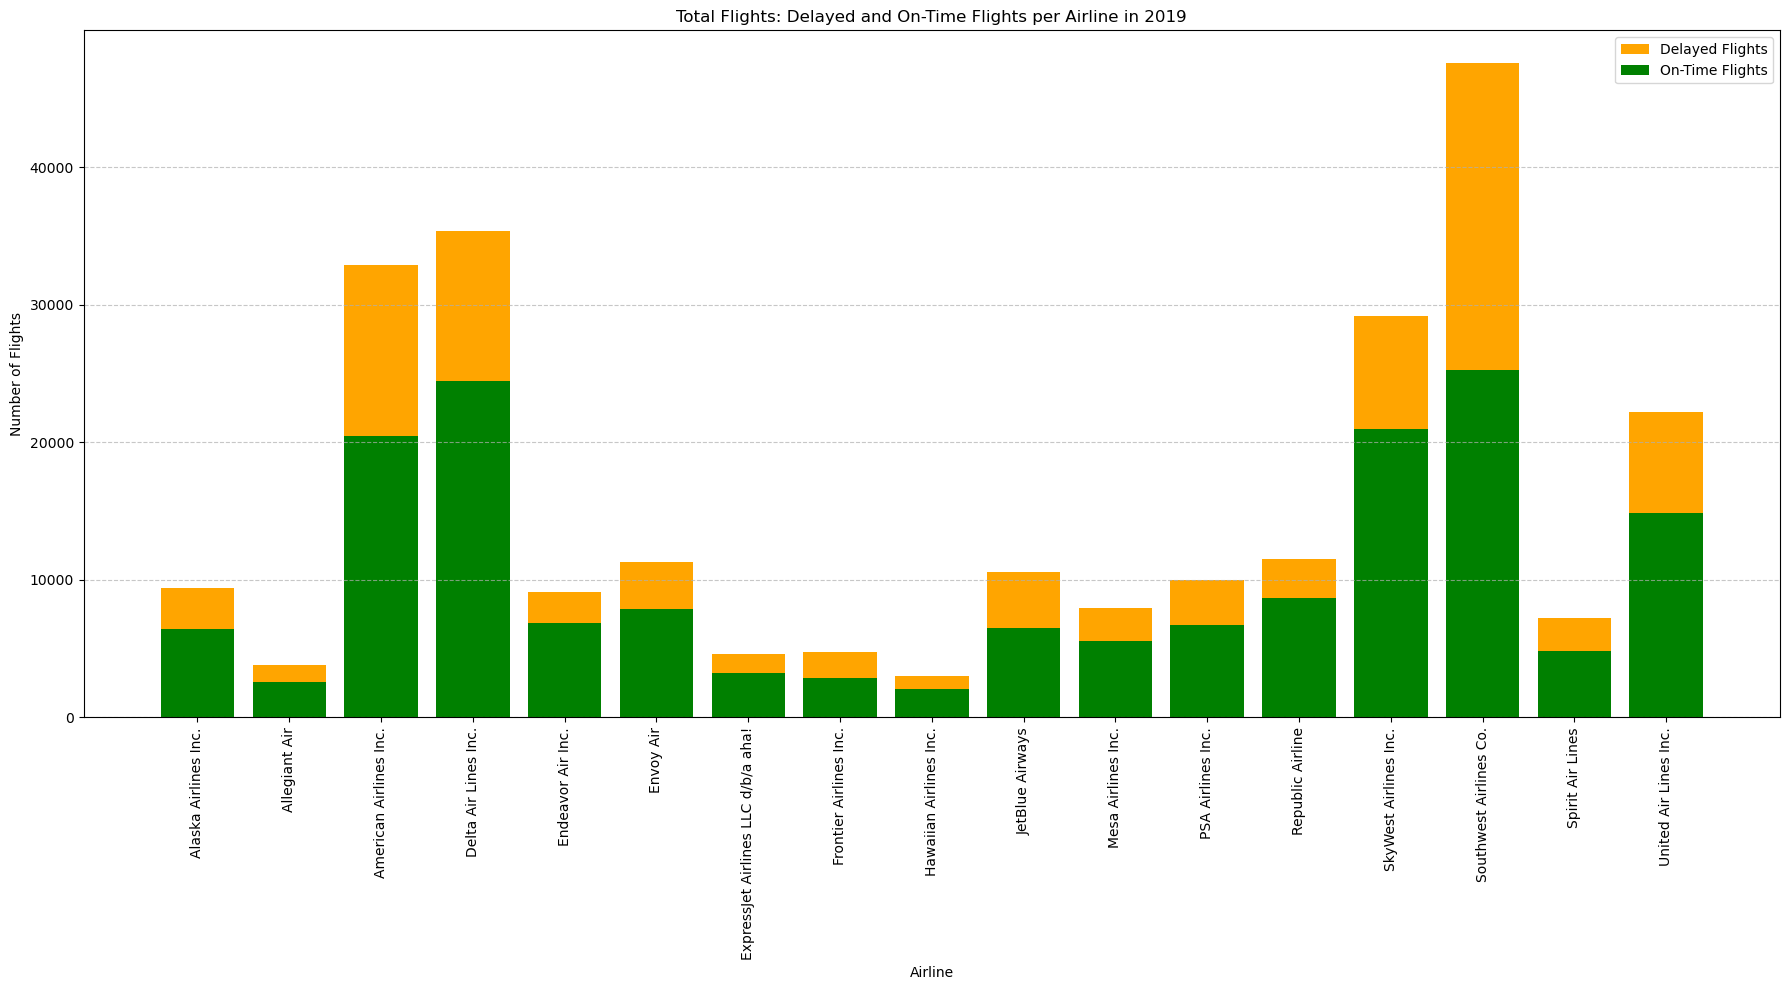

,Percentage On-Time Flights,Percentage Delayed Flights
Airline,,
Southwest Airlines Co.,53.12%,46.88%
Frontier Airlines Inc.,59.87%,40.13%
JetBlue Airways,61.11%,38.89%
American Airlines Inc.,62.06%,37.94%
United Air Lines Inc.,66.95%,33.05%
PSA Airlines Inc.,67.06%,32.94%
Spirit Air Lines,67.06%,32.94%
Allegiant Air,67.43%,32.57%
Alaska Airlines Inc.,68.20%,31.80%


In [88]:
# to calculate counts of delayed flights per airline
delayed_flights_per_airline = df_delays_2019[df_delays_2019['DEP_DELAY'] > 0].groupby('AIRLINE').size()

# to calculate counts of on-time flights per airline
on_time_flights_per_airline = df_delays_2019[df_delays_2019['DEP_DELAY'] <= 0].groupby('AIRLINE').size()

# to create a stacked bar graph showing the total number of flights, delayed flights, and on-time flights per airline
plt.figure(figsize=(18, 10))

# to plot on-time portion of total flights per airline
plt.bar(delayed_flights_per_airline.index, delayed_flights_per_airline.values, color='orange', label='Delayed Flights', bottom=on_time_flights_per_airline.values)

# to plot delayed portion of total flights per airline
plt.bar(on_time_flights_per_airline.index, on_time_flights_per_airline.values, color='green', label='On-Time Flights')

# to add legend above the bars
plt.legend()

plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Total Flights: Delayed and On-Time Flights per Airline in 2019')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Table to display PERCENTAGE OF DELAYED FLIGHTS 
# to calculate counts of delayed flights per airline
delayed_flights_per_airline = df_delays_2019[df_delays_2019['DEP_DELAY'] > 0].groupby('AIRLINE').size()

# to calculate counts of on-time flights per airline
on_time_flights_per_airline = df_delays_2019[df_delays_2019['DEP_DELAY'] <= 0].groupby('AIRLINE').size()

# to calculate total flights per airline
total_flights_per_airline = on_time_flights_per_airline + delayed_flights_per_airline

# to calculate percentage of on-time flights per airline
percentage_on_time_airline = (on_time_flights_per_airline / total_flights_per_airline) * 100

# to calculate percentage of delayed flights per airline
percentage_delayed_airline = (delayed_flights_per_airline / total_flights_per_airline) * 100

# to combine the series into a DataFrame for easier visualization
percentage_airline_df = pd.DataFrame({
    'Airline': delayed_flights_per_airline.index,
    'Percentage On-Time Flights': percentage_on_time_airline.values,
    'Percentage Delayed Flights': percentage_delayed_airline.values
})

# to sort the DataFrame by Percentage Delayed Flights in descending order
percentage_airline_df = percentage_airline_df.sort_values(by='Percentage Delayed Flights', ascending=False)

# to set 'Airline' as index
percentage_airline_df.set_index('Airline', inplace=True)

# to apply styling to the DataFrame
styled_percentage_airline_df = percentage_airline_df.style \
    .background_gradient(cmap='coolwarm') \
    .format("{:.2f}%") \
    .set_caption("Percentage of On-Time and Delayed Flights per Airline")

styled_percentage_airline_df


### Findings for: 2. Are certain airlines more prone to flight delays?

Based on the visualizations above, we can draw the following conclusions regarding the question “Are certain airlines more prone to flight delays?”

**Visualization with Stacked Bar Chart & Summary Table:**

 - Southwest Airlines Co. have the highest number of total flights per year; however, they also have the highest percentage of delayed flights (46.88%)
  
 - Delta Air Lines Inc. have the second highest number of total flights per year, and they have average by industry standards percentage of delayed flights (30.78%)
  
 - American Airlines Inc. have the third highest number of total flights per year, and they have higher than average by industry standards percentage of delayed flights (37.94%)
  
- SkyWest Airlines Inc. have the fourth highest number of total flights per year and have a relatively high percentage of on-time flight (above 70%) and relatively low percentages of delayed flights (28.04%), suggesting an outstanding operational efficiency and performance.
	 
- Airlines like Endeavor Air Inc., Republic Airline, and SkyWest Airlines Inc. have relatively high percentages of on-time flights (above 70%), suggesting better punctuality.

- Airlines like Frontier Airlines Inc. and Southwest Airlines Co. have higher percentages of delayed flights (above 40%), indicating a higher likelihood of delays with these carriers.


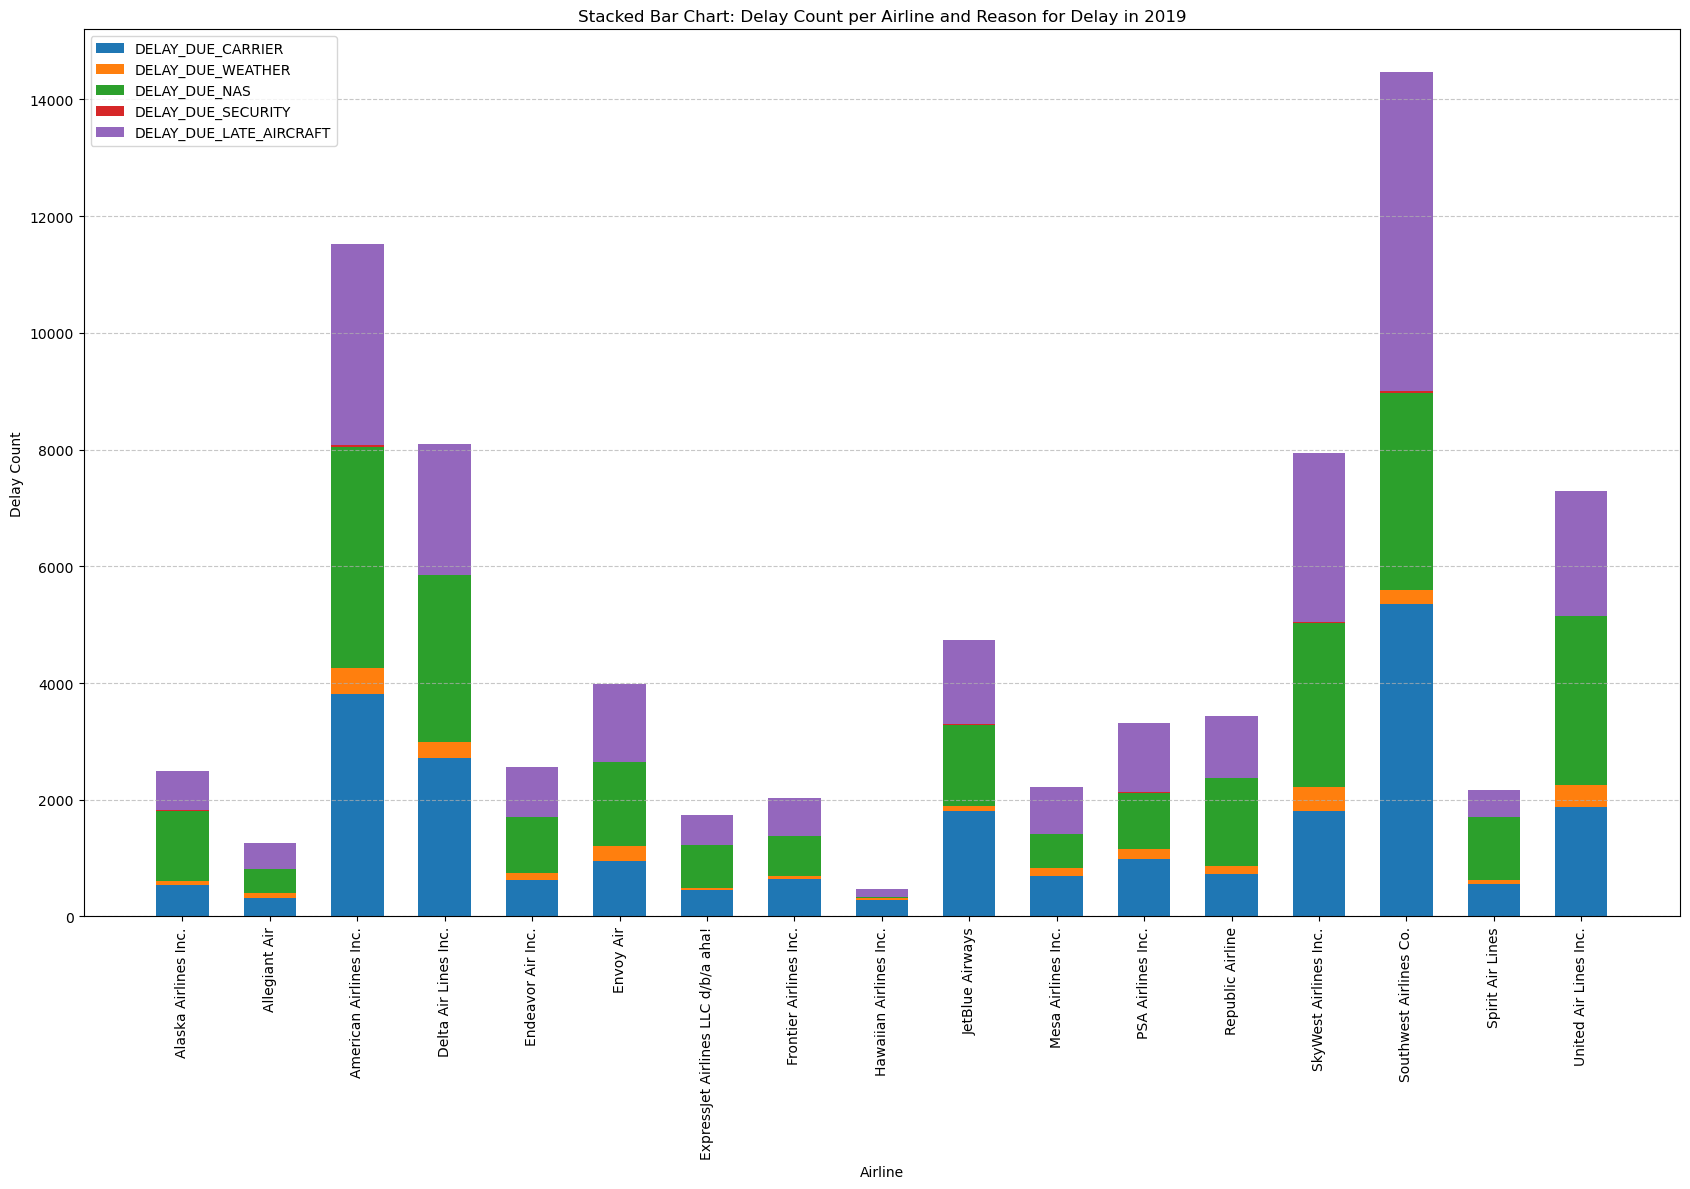

,DELAY_DUE_CARRIER
Airline,
JetBlue Airways,43.95%
Frontier Airlines Inc.,33.66%
Hawaiian Airlines Inc.,32.36%
ExpressJet Airlines LLC d/b/a aha!,32.23%
American Airlines Inc.,30.47%
PSA Airlines Inc.,30.19%
Mesa Airlines Inc.,29.36%
Envoy Air,27.62%
Endeavor Air Inc.,27.43%


In [115]:
# to define the reasons for delay
reasons_for_delay = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

# to initialize a dictionary to store delay counts per airline and reason
delay_counts = {reason: df_delays_2019.groupby(['AIRLINE'])[reason].apply(lambda x: (x > 0).sum()) for reason in reasons_for_delay}

# to convert the dictionary to a DataFrame
delay_counts_df = pd.DataFrame(delay_counts)

# to create a stacked bar graph showing the count of delayed flights per airline and reason for delay
plt.figure(figsize=(17, 12))

# to set the width of the bars
num_bars = len(delay_counts_df)
bar_width = 0.6
index = np.arange(num_bars)

# to initialize the bottom values for stacking
bottom_values = np.zeros(num_bars)

# to plot bars for each reason for delay
for reason in reasons_for_delay:
    plt.bar(index, delay_counts_df[reason], width=bar_width, label=reason, bottom=bottom_values)
    bottom_values += np.array(delay_counts_df[reason])

plt.legend()

plt.xlabel('Airline')
plt.ylabel('Delay Count')
plt.title('Stacked Bar Chart: Delay Count per Airline and Reason for Delay in 2019')
plt.xticks(index, delay_counts_df.index, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Table to display PERCENTAGE OF DELAYS DUE TO CARRIER

# to calculate the total number of delayed flights per airline
total_delayed_flights_per_airline = df_delays_2019[df_delays_2019['DEP_DELAY'] > 0].groupby('AIRLINE').size()

# to calculate the count of delayed flights per airline and reason for delay
delay_counts = {reason: df_delays_2019.groupby(['AIRLINE'])[reason].apply(lambda x: (x > 0).sum()) for reason in reasons_for_delay}

# to convert the dictionary to a DataFrame
delay_counts_df = pd.DataFrame(delay_counts)

# to select only the column 'DELAY_DUE_CARRIER'
delay_due_carrier_df = delay_counts_df[['DELAY_DUE_CARRIER']]

# to calculate the percentage of delay reasons for each airline
percentage_delay_reasons_df = delay_due_carrier_df.div(total_delayed_flights_per_airline, axis=0) * 100

# to sort the column 'DELAY_DUE_CARRIER' from highest to lowest
sorted_percentage_delay_reasons_df = percentage_delay_reasons_df.sort_values(by='DELAY_DUE_CARRIER', ascending=False)

# to format the DataFrame with percentage sign and apply styling
styled_percentage_delay_reasons_df = sorted_percentage_delay_reasons_df.style.format("{:.2f}%").background_gradient(cmap='Blues')

# to display the styled DataFrame
styled_percentage_delay_reasons_df.index.name = 'Airline'
styled_percentage_delay_reasons_df.set_table_styles([{
    'selector': 'th',
    'props': [('background-color', 'lightblue'), ('color', 'black'), ('font-weight', 'bold')]
}])

display(styled_percentage_delay_reasons_df)


### Findings for: 2. Are certain airlines more prone to flight delays?

As we can see from the “Stacked Bar Chart: Delay Count per Airline and Reason for Delay in 2019” the top 3 reasons of flight delay for all airlines are: Delay due to Late Aircraft, delay due to NAS (national airspace system), Delay due to Carrier. 

We will focus on the delay reason "Delay due to Carrier": 

Previously, by looking at the "Percentage of On-Time and Delayed Flights per Airline" we have identified **top 4 airlines with the highest percentage of delays:**

- Southwest Airlines Co. (46.88%) 
- Frontier Airlines Inc. (40.13%)
- JetBlue Airways (38.89%)
- American Airlines Inc. (37.94%). 

Now let's see what is the percentage of **Delays Due to Carrier** for each of these airlines:

- Southwest Airlines Co. (24.00%) - lower than industry average 
- Frontier Airlines Inc. (33.66%) - higher than industry aveage 
- JetBlue Airways (43.95%) - highest in the industry percentage of Delays Due to Carrier
- American Airlines Inc. (30.47%) - slightly higher than the industry average


Based on the data we can make the following observations:

- Airlines with higher percentages of on-time flights are generally considered to have better punctuality.
- Airlines with higher percentages of delayed flights are more prone to flight delays and may have operational issues affecting their timeliness. However, it is also important to consider the reasons for flight delays and assess whether those delays were due to Carrier or other reasons before making any conclusion on the airline's performance. 


By analyzing the percentages of on-time and delayed flights per airline, passengers can make informed decisions when selecting airlines for their travel needs. Additionally, airlines can use this information to identify areas for improvement in their operational efficiency and customer service to reduce the frequency of flight delays.



***
### Guiding Question 3: Are certain airports more prone to delays? 

Based on our data, we will create a folium map visualization that displays a colour coded map for the counts of delayed flights for each airport to gain a better understanding of which airports are more prone to flight delays.

While analyzing the findings, it is important to keep in mind that certain airports are more prone to delays due to a variety of factors including geographical location, weather conditions, air traffic volume, and infrastructure limitations (United States Department of Transportation, 2024).

- **Geographical Location:** Airports located in regions prone to adverse weather conditions such as snowstorms, hurricanes, or fog are more likely to experience delays. For example, airports in northern regions may face delays due to snow and ice during the winter months.

- **Air Traffic Volume**: Busier airports with higher volumes of flights are more susceptible to delays, especially during peak travel times. The sheer number of aircraft arriving and departing can strain airport resources and lead to delays in takeoffs and landings.

- **Infrastructure Limitations:** Older airports with outdated infrastructure may struggle to handle the increasing demands of modern air travel. Limited runway capacity, outdated air traffic control systems, and inadequate terminal facilities can contribute to delays.

- **Personnel Constraints:** Airports with insufficient staffing levels or inadequate training for air traffic controllers, ground crews, and security personnel may experience delays due to operational inefficiencies.

- **Airspace Congestion:** Airports located in congested airspace may experience delays due to air traffic management constraints. Delays can occur when aircraft are required to be held in a queue before landing or when airspace restrictions are imposed due to military activities or special events.

- **Regional Factors:** Some regions may have specific challenges that contribute to delays, such as airspace restrictions near major cities or military installations.


In [22]:
#data cleaning done again to answer questions 3-5

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('flights_sample_3m.csv') #read file
df['FL_DATE'] = pd.to_datetime(df['FL_DATE']) #datetime function
df['Year'] = df['FL_DATE'].dt.year #Column Year
df['Month'] = df['FL_DATE'].dt.month #Column Month
df['Day'] = df['FL_DATE'].dt.day #Column Day
df.set_index(['Year','Month','Day'], inplace=True) #setindex
df.reset_index(inplace=True) #reset index
df = df[df['Year']==2019] #only using 2019 data
df= df.sort_values(['FL_DATE']).reset_index() #sort by Date
#print(df.head())
#print(df.columns())

geo_columns = ['AIRLINE','ORIGIN','DEST','ORIGIN_CITY','DEST_CITY','CRS_DEP_TIME','DEP_TIME','DEP_DELAY','CRS_ARR_TIME','ARR_TIME', 'ARR_DELAY', 'CANCELLED'] #making relevant columns
df_geo_flights = df[geo_columns] #new df
df_geo = df[geo_columns] 
df_geo = df_geo[df_geo['DEP_DELAY'] >= 0] #delayed flights
df_geo_delay = df[geo_columns] #calculating proportion of flights that are getting delayed
prop_delay_oc = df_geo['ORIGIN_CITY'].value_counts()/df_geo_delay['ORIGIN_CITY'].value_counts()
prop_delay_oc = prop_delay_oc.sort_values(ascending = False)

df_geo['ORIGIN'].value_counts().head(5)

ORIGIN
ATL    5814
ORD    4785
DFW    4554
DEN    4405
LAX    3475
Name: count, dtype: int64

In [23]:
cities_info = { #manually putting in latitude longtitude and delay counts
    "ATL": {"coords": (33.7490, -84.3880), "delays": 16473},
    "ORD": {"coords": (41.8781, -87.6298), "delays": 13649},
    "DFW": {"coords": (32.8998, -97.0403), "delays": 13165},
    "DEN": {"coords": (39.7392, -104.9903), "delays": 12408},
    "LAX": {"coords": (33.9416, -118.4085), "delays": 9812},
    "CLT": {"coords": (35.214, -80.9431), "delays": 9747},
    "PHX": {"coords": (33.4352, -112.0116), "delays": 7833},
    "LAS": {"coords": (36.0840, -115.1537), "delays": 7751},
    "SFO": {"coords": (37.6213, -122.3790), "delays": 7309},
    "LGA": {"coords": (40.7769, -73.8740), "delays": 6804},
    "IAH": {"coords": (29.9902, -95.3368), "delays": 6696},
    "SEA": {"coords": (47.4502, -122.3088), "delays": 6261},
    "MCO": {"coords": (28.4312, -81.3080), "delays": 6185},
    "BOS": {"coords": (42.3656, -71.0096), "delays": 6031},
    "MSP": {"coords": (44.8848, -93.2223), "delays": 5928},
    "DTW": {"coords": (42.2162, -83.3554), "delays": 5832},
    "EWR": {"coords": (40.6925, -74.1687), "delays": 5603},
    "MDW": {"coords": (41.7868, -87.7522), "delays": 5205},
    "BWI": {"coords": (39.1774, -76.6684), "delays": 5155},
    "DCA": {"coords": (38.8512, -77.0402), "delays": 4813},
    "JFK": {"coords": (40.6413, -73.7781), "delays": 4791},
    "FLL": {"coords": (26.0726, -80.1527), "delays": 4432},
    "DAL": {"coords": (32.8471, -96.8518), "delays": 4382},
    "SLC": {"coords": (40.7899, -111.9791), "delays": 4367},
    "PHL": {"coords": (39.8744, -75.2424), "delays": 4151},
    "SAN": {"coords": (32.7338, -117.1933), "delays": 3865},
    "HOU": {"coords": (29.6454, -95.2789), "delays": 3727},
    "BNA": {"coords": (36.1263, -86.6774), "delays": 3666},
    "STL": {"coords": (38.7472, -90.3599), "delays": 3455},
    "MIA": {"coords": (25.7959, -80.2870), "delays": 3407},
    "TPA": {"coords": (27.9755, -82.5332), "delays": 3061},
    "OAK": {"coords": (37.7126, -122.2197), "delays": 2838},
    "AUS": {"coords": (30.1975, -97.6664), "delays": 2760},
    "MSY": {"coords": (29.9934, -90.2580), "delays": 2608},
    "RDU": {"coords": (35.8801, -78.7871), "delays": 2580},
    "SJC": {"coords": (37.3639, -121.9290), "delays": 2444},
    "MCI": {"coords": (39.2976, -94.7139), "delays": 2208},
    "IAD": {"coords": (38.9531, -77.4565), "delays": 2206},
    "PDX": {"coords": (45.5898, -122.5951), "delays": 2147},
    "SMF": {"coords": (38.6951, -121.5908), "delays": 2062},
    "HNL": {"coords": (21.3245, -157.9251), "delays": 1844},
    "CVG": {"coords": (39.0469, -84.6620), "delays": 1772},
    "IND": {"coords": (39.7173, -86.2944), "delays": 1762},
    "CMH": {"coords": (39.9980, -82.8919), "delays": 1692},
    "CLE": {"coords": (41.4115, -81.8498), "delays": 1667},
    "PIT": {"coords": (40.4915, -80.2329), "delays": 1596},
    "SNA": {"coords": (33.6762, -117.8675), "delays": 1591},
    "SAT": {"coords": (29.4241, -98.4936), "delays": 1497},
    "BUR": {"coords": (34.1983, -118.3574), "delays": 1298},
    "RSW": {"coords": (26.5362, -81.7552), "delays": 1257},
    "MKE": {"coords": (42.9476, -87.8966), "delays": 1164},
    "JAX": {"coords": (30.4941, -81.6879), "delays": 1117},
    "SJU": {"coords": (18.4394, -66.0018), "delays": 1097},
    "ABQ": {"coords": (35.0403, -106.6092), "delays": 1048},
    "PBI": {"coords": (26.6832, -80.0956), "delays": 1002},
    "BDL": {"coords": (41.9389, -72.6832), "delays": 999},
    "OGG": {"coords": (20.8987, -156.4305), "delays": 965},
    "OMA": {"coords": (41.3032, -95.8941), "delays": 941},
    "ONT": {"coords": (34.0559, -117.6000), "delays": 932},
    "SDF": {"coords": (38.1744, -85.7360), "delays": 895},
    "BUF": {"coords": (42.9405, -78.7322), "delays": 876},
    "ORF": {"coords": (36.8957, -76.2000), "delays": 852},
    "OKC": {"coords": (35.3931, -97.6007), "delays": 843},
    "CHS": {"coords": (32.8983, -80.0405), "delays": 835},
    "MEM": {"coords": (35.0421, -89.9792), "delays": 825},
    "RIC": {"coords": (37.5052, -77.3197), "delays": 822},
    "RNO": {"coords": (39.4996, -119.7681), "delays": 739},
    "GRR": {"coords": (42.8808, -85.5228), "delays": 685},
    "BHM": {"coords": (33.5629, -86.7535), "delays": 680},
    "PVD": {"coords": (41.7240, -71.4282), "delays": 667},
    "ELP": {"coords": (31.8072, -106.3776), "delays": 641},
    "SAV": {"coords": (32.1276, -81.2021), "delays": 617},
    "TUS": {"coords": (32.1145, -110.9392), "delays": 583},
    "BOI": {"coords": (43.5644, -116.2228), "delays": 560},
    "TUL": {"coords": (36.1984, -95.8839), "delays": 560},
    "TYS": {"coords": (35.8125, -83.9929), "delays": 535},
    "GSP": {"coords": (34.8957, -82.2189), "delays": 503},
    "DSM": {"coords": (41.5340, -93.6631), "delays": 496},
    "HPN": {"coords": (41.0669, -73.7076), "delays": 494},
    "LIT": {"coords": (34.7294, -92.2243), "delays": 488},
    "LGB": {"coords": (33.8177, -118.1516), "delays": 463},
    "GSO": {"coords": (36.0978, -79.9373), "delays": 460},
    "MSN": {"coords": (43.1399, -89.3375), "delays": 459},
    "ROC": {"coords": (43.1189, -77.6724), "delays": 458},
    "XNA": {"coords": (36.2819, -94.3068), "delays": 447},
    "ANC": {"coords": (61.1743, -149.9982), "delays": 430},
    "SFB": {"coords": (28.7776, -81.2375), "delays": 420},
    "DAY": {"coords": (39.9024, -84.2194), "delays": 419},
    "ALB": {"coords": (42.7491, -73.8019), "delays": 416},
    "LIH": {"coords": (21.976, -159.338), "delays": 403},
    "GEG": {"coords": (47.6199, -117.5338), "delays": 394},
    "MYR": {"coords": (33.6797, -78.9283), "delays": 393},
    "PNS": {"coords": (30.4734, -87.1866), "delays": 384},
    "CID": {"coords": (41.8847, -91.7108), "delays": 382},
    "KOA": {"coords": (19.7388, -156.0456), "delays": 382},
    "PWM": {"coords": (43.6462, -70.3093), "delays": 352},
    "PSP": {"coords": (33.8303, -116.507), "delays": 352},
    "SYR": {"coords": (43.1112, -76.1063), "delays": 347},
    "FAT": {"coords": (36.7762, -119.7181), "delays": 334},
    "ICT": {"coords": (37.6499, -97.4331), "delays": 328},
    "AZA": {"coords": (33.3078, -111.6541), "delays": 316},
    "BTV": {"coords": (44.4719, -73.1533), "delays": 316},
    "COS": {"coords": (38.8058, -104.7001), "delays": 308},
    "VPS": {"coords": (30.4832, -86.5254), "delays": 306},
    "AVL": {"coords": (35.4362, -82.5418), "delays": 305},
    "SGF": {"coords": (37.2457, -93.3886), "delays": 304},
    "SRQ": {"coords": (27.3953, -82.5541), "delays": 297},
    "CHA": {"coords": (35.0353, -85.2038), "delays": 290}
}
# Create a base map (GeoPandas Developers, n.d.)

m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # Centered on the geographic center of the USA

# Define color based on the number of delays
def get_color(delays):
    if delays > 10000:
        return 'red'
    elif delays > 5000:
        return 'orange'
    elif delays > 1000:
        return 'blue'
    else:
        return 'green'
for city, info in cities_info.items(): #using folium to create a map
    folium.CircleMarker(
        location=info['coords'],
        radius=5,
        popup=f"{city}:{info['delays']} delays",
        color=get_color(info['delays']),
        fill=True,
        fill_color=get_color(info['delays'])
    ).add_to(m)
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 120px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; Flight Delays Legend <br>
      &nbsp; <span style="color: red;">> 10000 - Red</span> <br>
      &nbsp; <span style="color: orange;">> 5000 - Orange</span> <br>
      &nbsp; <span style="color: blue;">> 1000 - Blue</span> <br>
      &nbsp; <span style="color: green;"><= 1000 - Green</span>
     </div>
     '''
#(Towards Data Science, 2023)
#requires html to manually put in legend (Towards Data Science, 2023)
m.get_root().html.add_child(folium.Element(legend_html))
m


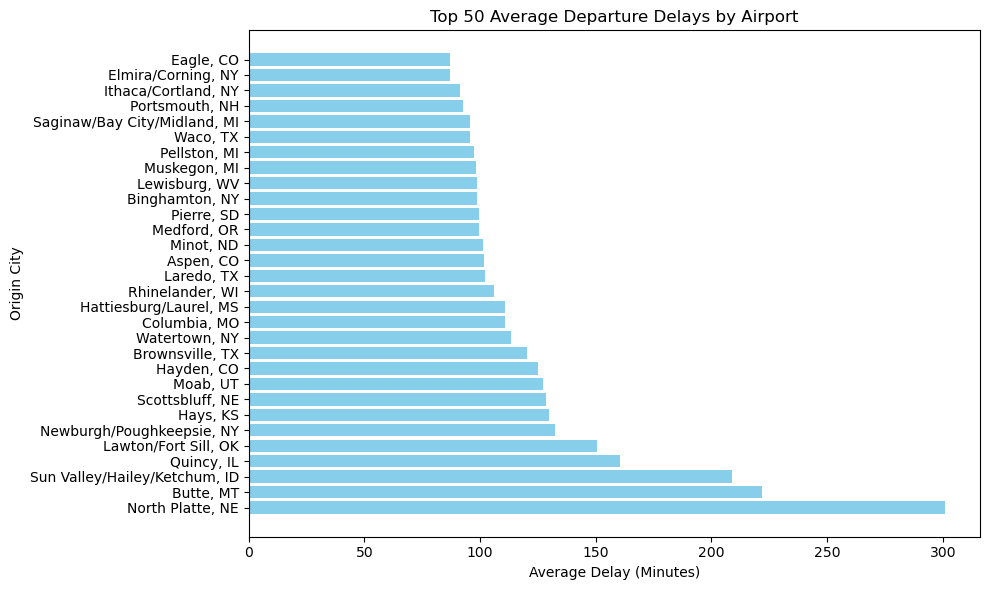

In [36]:
#Find the average departure delay grouped by origin city, used origin city instead of airport because I don't believe heard of any of those airport
df_geo_avg_delay_OC = df_geo.groupby(['ORIGIN_CITY'])[['DEP_DELAY']].mean().reset_index() 
#sort from top to bottom
df_geo_avg_delay_OC = df_geo_avg_delay_OC.sort_values('DEP_DELAY', ascending=False) 
#choose top 30
df_geo_avg_delay_top_30_OC = df_geo_avg_delay_OC.head(30)
#graph
plt.figure(figsize=(10, 6))
plt.barh(df_geo_avg_delay_top_30_OC['ORIGIN_CITY'], df_geo_avg_delay_top_30_OC['DEP_DELAY'], color='skyblue')
plt.xlabel('Average Delay (Minutes)')
plt.ylabel('Origin City')
plt.title('Top 50 Average Departure Delays by Airport')
plt.tight_layout()
plt.show()

### Findings for Question 3

From the map visualization above we can see that Chicago (ORD), Denver (DEN), Atlanta (ATL), Dallas (DFW) airports are marked red indicating that these airports had more than 10000 delayed flights in 2019. This could be to the fact that these airports have the highest amounts of connecting flights in the US (United States Department of Transportation, 2024). While these airports are major transportation hubs, they are also susceptible to delays caused by weather, air traffic volume, airspace congestion, and infrastructure limitations.

Based on the analysis above, flights in bigger cities have higher delay counts. However, their average delay times are low. This could be is due to the fact that bigger airports always have enough personnel with extra works (United States Department of Transportation, 2024).
In comparison, in small airports, there are higher average delay times. In smaller cities and airports due to lack of workers any mishaps on aircrafts will only magnify the problems (United States Department of Transportation, 2024).


#### Question 4: What are the major factors causing flight delays?

According to the Federal Aviation Administration (n.d.), understanding the major factors causing flight delays is crucial for various stakeholders within the aviation industry. Understanding the major factors causing flight delays is crucial for various stakeholders within the aviation industry, including airlines, airports, regulatory bodies, and travelers, for several reasons:

- **Operational Efficiency:** Identifying the primary factors contributing to flight delays allows airlines and airports to streamline operations and optimize resources. By addressing root causes such as air traffic congestion, weather-related disruptions, or infrastructure limitations, stakeholders can implement strategies to improve operational efficiency and reduce delays.

- **Customer Satisfaction:** Flight delays can lead to frustration and inconvenience for passengers. Understanding the major factors causing delays enables airlines to proactively communicate with passengers, manage expectations, and provide alternative travel arrangements when necessary. By minimizing disruptions and improving reliability, airlines can enhance customer satisfaction and loyalty.

- **Safety and Security:** Certain delay factors, such as adverse weather conditions or air traffic management issues, may pose safety risks to flight operations. By identifying and addressing these factors, regulatory bodies and aviation authorities can implement measures to ensure the safety and security of air travel.

- **Financial Implications:** Flight delays incur significant costs for airlines, airports, and passengers. Delays result in increased fuel consumption, operational expenses, and potential revenue losses for airlines. Airports may also experience decreased productivity and revenue from retail and concessions during delays. Understanding the major factors causing delays allows stakeholders to quantify the financial implications and implement cost-effective strategies to mitigate losses.

- **Regulatory Compliance:** Aviation regulatory bodies impose standards and regulations to ensure the safe and efficient operation of air travel. By understanding the major factors contributing to delays, regulatory bodies can assess compliance with regulatory requirements, identify areas for improvement, and implement measures to enhance aviation safety and efficiency.

- **Data-Driven Decision Making:** Analyzing delay data provides valuable insights into trends, patterns, and correlations that can inform data-driven decision-making processes. By leveraging data analytics and predictive modeling, stakeholders can anticipate potential delays, optimize scheduling, and allocate resources effectively to minimize disruptions and improve overall operational performance.

  In order to visualize which factors contribute to the flight delays the most we will use a pie chart. A pie chart representing the reasons for delay for total flights in the year 2019 can provide valuable insights into the primary causes of flight delays and their respective contributions to overall delay occurrences. A pie chart depicting the reasons for delay for total flights in the year 2019 serves as a powerful visual tool for understanding:

  - **Primary Contributors Identification:** The pie chart visually highlights the main reasons for flight delays, making it easy to identify the primary contributors at a glance.
  - **Comparative Analysis:** Stakeholders can quickly compare the sizes of different segments in the pie chart to assess the relative importance of each delay reason, helping prioritize areas for improvement.
  - **Trend Analysis:** Analyzing pie charts for multiple years reveals changing trends and patterns in delay occurrences, enabling proactive measures to address evolving challenges.
  - **Root Cause Analysis:** The chart serves as a starting point for deeper investigations into the underlying factors contributing to delays within each category.
  - **Performance Benchmarking:** Comparing delay reasons across different entities allows stakeholders to benchmark performance and identify best practices for improvement.
  - **Resource Allocation and Mitigation Strategies:** Insights from the pie chart inform resource allocation and the implementation of targeted mitigation strategies to address prevalent delay reasons effectively.

DELAY_DUE_CARRIER          24171
DELAY_DUE_WEATHER           2963
DELAY_DUE_NAS              26681
DELAY_DUE_SECURITY           146
DELAY_DUE_LATE_AIRCRAFT    25771
dtype: int64


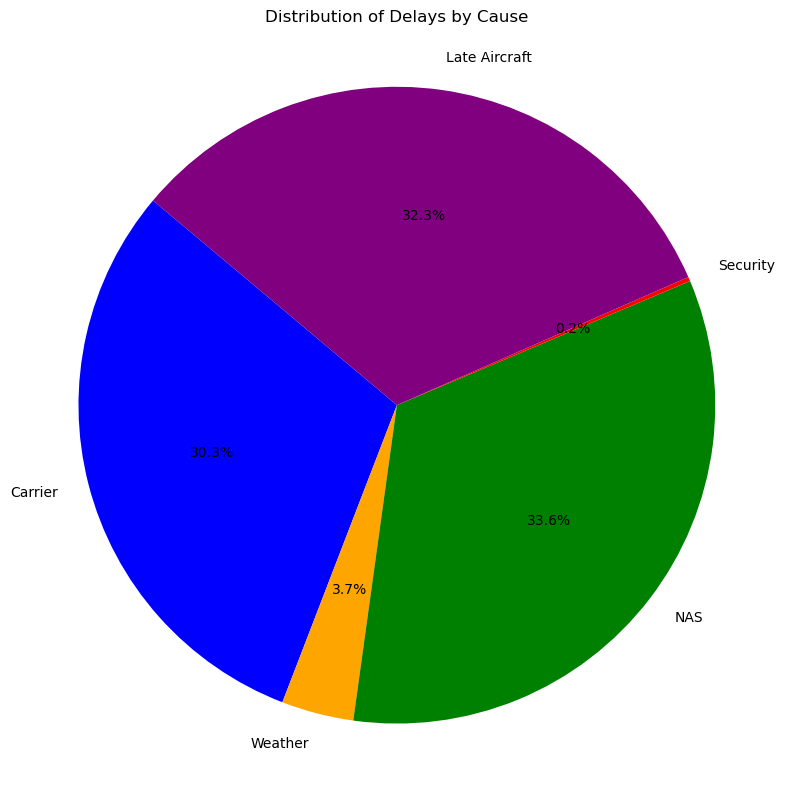

In [30]:
delay_columns = ['DEP_DELAY','ARR_DELAY','DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
df_delay = df[delay_columns].copy()
df_delay = df_delay.fillna(0) #change NAN to 0
df_delay = df_delay[df_delay['ARR_DELAY'] > 0] #delayed flights
df_delay['SUM_DELAYS'] = df_delay[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']].sum(axis=1)
#df_delay.describe()
#Data is collected the way that these 5 causes always equalled Arrival Delay
delay_causes_counts = df_delay[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']].apply(lambda x: (x > 0).astype(int)).sum()
print(delay_causes_counts) #Make sure only the delayede flight with lambda function x:x>0
delay_causes = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
delay_counts = [68518, 8304, 76011, 489, 73138] #hardcoded for low numbers of elements graphing purpose

#Created pie chart to compare which factor contributes to most flight delay counts
plt.figure(figsize=(8, 8))
plt.pie(delay_counts, labels=delay_causes, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red','purple'])
plt.title('Distribution of Delays by Cause')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Findings for Question 4:

Analyzing the percentages of causes of delay from the pie chart above yields several valuable insights:

**NAS (National Airspace System) is the Leading Cause:** NAS-related issues account for the highest proportion of delays at 33.6%. This insight indicates systemic challenges within the air traffic control system, such as congestion, capacity constraints, and inefficient routing, which contribute significantly to delays.

**Significant Impact of Late Aircraft:** Late arrival of aircraft contributes to 32.3% of delays, indicating challenges in maintaining punctuality within airline operations. Addressing factors leading to late arrivals, such as scheduling inefficiencies, turnaround times, and maintenance delays, can help mitigate this issue.

**Carrier-Related Delays:** Delay due to carrier issues represents 30.3% of delays. This category encompasses various factors under airline control, including crew scheduling, maintenance issues, and operational disruptions. Airlines can focus on optimizing internal processes and enhancing operational reliability to reduce carrier-related delays.

**Weather and Security Play Minor Roles:** Weather-related delays (3.7%) and security-related delays (0.2%) constitute relatively small proportions of overall delays. While these factors have less impact compared to NAS, late aircraft, and carrier-related issues, they still contribute to disruptions in flight schedules. Weather monitoring and contingency planning remain essential to mitigate the impact of adverse weather conditions, while security measures must balance safety with operational efficiency. It is important to note that the percentage of delays attributed directly to weather in the provided data may be relatively small due to the fact that the National Airspace System (NAS) often plays a role in managing and mitigating the impact of adverse weather conditions on flight operations. Airways Magazine (2018) highlights the significance of the National Airspace System (NAS) in managing air traffic control and mitigating the impact of adverse weather conditions on flight operations.

**Operational Priorities and Mitigation Strategies:** Insights from the data suggest that stakeholders should prioritize improvements in NAS efficiency, addressing late aircraft arrivals, and optimizing carrier operations to reduce delays significantly. Implementation of technology upgrades, airspace management enhancements, and collaborative efforts among airlines and regulatory authorities can help address systemic challenges contributing to delays across the aviation system.

**Data-Driven Decision Making:** The data underscores the importance of data-driven decision-making processes to identify, prioritize, and address key factors contributing to flight delays. Regular analysis of delay patterns and proactive measures to address underlying issues are essential to improving operational efficiency and enhancing the passenger experience in the aviation industry.

### Question 5: Do airtime & distance affect flight delays?

According to Airline Operations Control (2018), longer flights typically have higher delay probabilities due to factors such as increased complexity in flight planning, higher probability of encountering adverse weather conditions, and greater likelihood of encountering air traffic congestion at busy airports. Additionally, longer flights may require more intricate logistics for fueling, catering, and crew rest, which can contribute to delays.

Using a histogram with total flights vs. delayed flights can be useful to visualize the relationship between airtime/distance and flight delays. The histogram can show the distribution of total flights across different airtime or distance categories, with delayed flights represented as a subset of total flights within each category. This visualization can help identify patterns or trends in delay occurrences based on flight duration or distance traveled.

A bar graph showing the proportion of delayed flights by distance category provides a more focused view of how flight delays vary across different distance ranges. By categorizing flights into distance intervals (e.g., short-haul, medium-haul, long-haul), stakeholders can assess the proportion of delayed flights within each category. This visualization allows for a comparative analysis of delay probabilities based on flight distance, helping identify whether longer flights experience proportionally more delays compared to shorter ones.

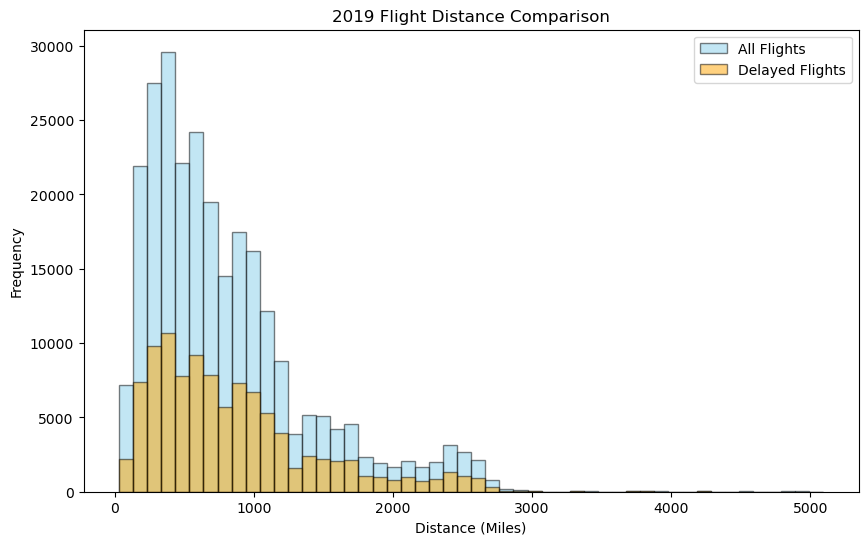

count    265002.000000
mean        799.609773
std         590.798535
min          31.000000
25%         368.000000
50%         639.000000
75%        1034.000000
max        5095.000000
Name: DISTANCE, dtype: float64


In [31]:
dist_column = ['DEP_DELAY','AIR_TIME','DISTANCE','ORIGIN','DEST']
dist_df = df[dist_column]
dist_df_delay = dist_df[dist_df['DEP_DELAY'] >= 0] #delayed flights
plt.figure(figsize=(10, 6))
plt.hist(dist_df['DISTANCE'], bins=50, color='skyblue', alpha=0.5, edgecolor='black', label='All Flights')
plt.hist(dist_df_delay['DISTANCE'], bins=50, color='orange', alpha=0.5, edgecolor='black', label='Delayed Flights')
plt.title('2019 Flight Distance Comparison')
plt.xlabel('Distance (Miles)')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(dist_df['DISTANCE'].describe())

In [32]:
super_long_flights = dist_df[dist_df['DISTANCE'] > 5000]
long_flights = dist_df[(dist_df['DISTANCE'] > 1000) & (dist_df['DISTANCE'] <= 5000)]
medium_flights = dist_df[(dist_df['DISTANCE'] > 500) & (dist_df['DISTANCE'] <= 1000)]
short_flights = dist_df[(dist_df['DISTANCE'] > 0) & (dist_df['DISTANCE'] <= 500)]
print(super_long_flights['ORIGIN'].value_counts().sum()) #took out DEST because number is the same
print(long_flights['ORIGIN'].value_counts().sum())
print(medium_flights['ORIGIN'].value_counts().sum())
print(short_flights['ORIGIN'].value_counts().sum())
print(dist_df_delay['DISTANCE'].describe())
super_long_flights = dist_df[dist_df['DISTANCE'] > 5000]
long_flights = dist_df[(dist_df['DISTANCE'] > 1000) & (dist_df['DISTANCE'] <= 5000)]
medium_flights = dist_df[(dist_df['DISTANCE'] > 500) & (dist_df['DISTANCE'] <= 1000)]
short_flights = dist_df[(dist_df['DISTANCE'] > 0) & (dist_df['DISTANCE'] <= 500)]

8
71208
93063
100723
count    103641.000000
mean        851.040843
std         602.560526
min          31.000000
25%         401.000000
50%         693.000000
75%        1092.000000
max        5095.000000
Name: DISTANCE, dtype: float64


5
31576
36780
35280
count    259643.000000
mean        111.462292
std          70.405618
min           8.000000
25%          60.000000
50%          93.000000
75%         141.000000
max         659.000000
Name: AIR_TIME, dtype: float64


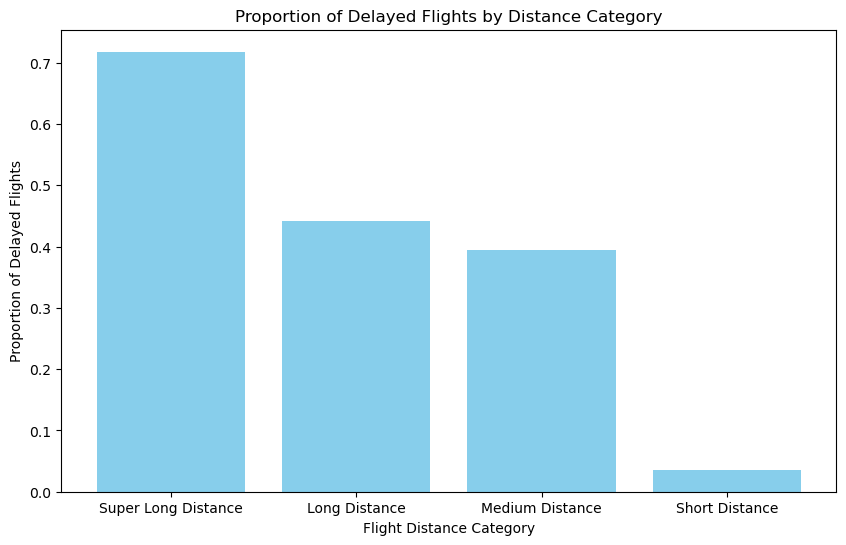

In [33]:
delayed_super_long_flights = dist_df_delay[dist_df_delay['DISTANCE'] > 5000]
delayed_long_flights = dist_df_delay[(dist_df_delay['DISTANCE'] > 1000) & (dist_df_delay['DISTANCE'] <= 5000)]
delayed_medium_flights = dist_df_delay[(dist_df_delay['DISTANCE'] > 500) & (dist_df_delay['DISTANCE'] <= 1000)]
delayed_short_flights = dist_df_delay[(dist_df_delay['DISTANCE'] > 0) & (dist_df_delay['DISTANCE'] <= 500)]
print(delayed_super_long_flights['ORIGIN'].value_counts().sum())
print(delayed_long_flights['ORIGIN'].value_counts().sum())
print(delayed_medium_flights['ORIGIN'].value_counts().sum())
print(delayed_short_flights['ORIGIN'].value_counts().sum())
print(dist_df['AIR_TIME'].describe())
prop = [28/39,89883/203303,105279/266710,100618/2878621]
labels = ['Super Long Distance', 'Long Distance', 'Medium Distance', 'Short Distance']
plt.figure(figsize=(10, 6)) # Optional: Adjust the figure size as needed
plt.bar(labels, prop, color='skyblue') # You can change the color
plt.xlabel('Flight Distance Category')
plt.ylabel('Proportion of Delayed Flights')
plt.title('Proportion of Delayed Flights by Distance Category')
plt.show()

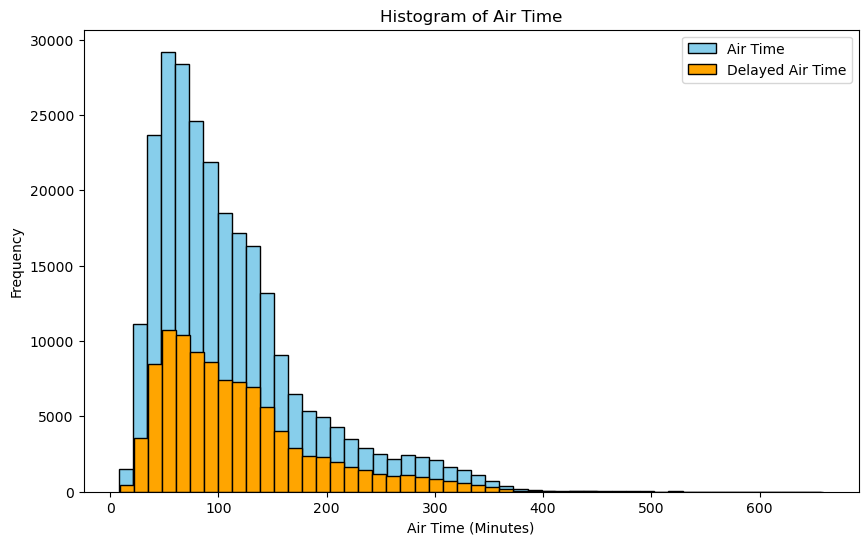

In [34]:
air_time = dist_df['AIR_TIME']
delayed_air_time = dist_df_delay['AIR_TIME']
plt.figure(figsize=(10, 6))
plt.hist(air_time, bins=50, color='skyblue', edgecolor='black',label='Air Time')
plt.hist(delayed_air_time, bins=50, color='orange', edgecolor='black',label='Delayed Air Time')
plt.title('Histogram of Air Time')
plt.xlabel('Air Time (Minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

64923
63794
65376
65550
28967
26423
24544
23225


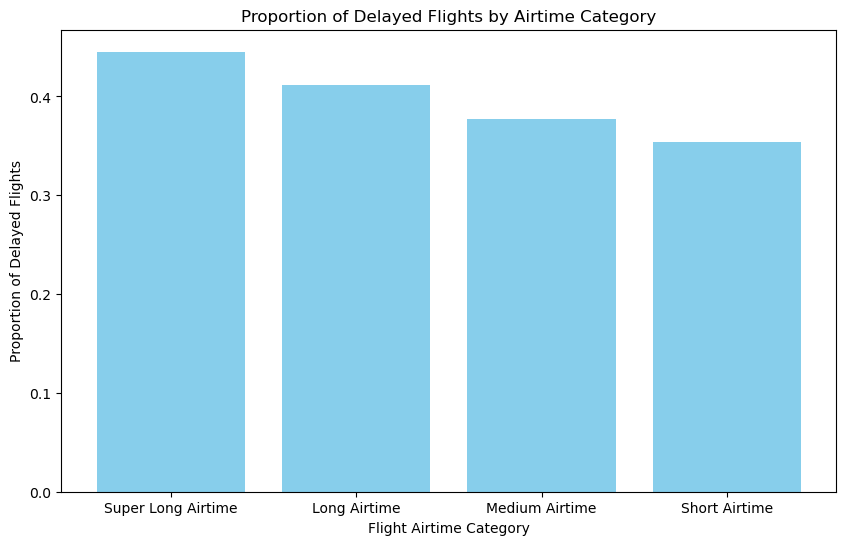

In [35]:
short_airtime = dist_df[dist_df['AIR_TIME'] <= 60]
medium_airtime = dist_df[(dist_df['AIR_TIME'] > 60) & (dist_df['AIR_TIME'] <= 93)]
long_airtime = dist_df[(dist_df['AIR_TIME'] > 93) & (dist_df['AIR_TIME'] <= 140)]
super_long_airtime = dist_df[dist_df['AIR_TIME'] > 140]
print(super_long_airtime['ORIGIN'].value_counts().sum())
print(long_airtime['ORIGIN'].value_counts().sum())
print(medium_airtime['ORIGIN'].value_counts().sum())
print(short_airtime['ORIGIN'].value_counts().sum())
delayed_super_long_airtime = dist_df_delay[dist_df_delay['AIR_TIME'] > 140]
delayed_long_airtime = dist_df_delay[(dist_df_delay['AIR_TIME'] > 93) & (dist_df_delay['AIR_TIME'] <= 140)]
delayed_medium_airtime = dist_df_delay[(dist_df_delay['AIR_TIME'] > 60) & (dist_df_delay['AIR_TIME'] <= 93)]
delayed_short_airtime = dist_df_delay[dist_df_delay['AIR_TIME'] <= 60]
print(delayed_super_long_airtime['ORIGIN'].value_counts().sum())  # Super long delayed airtime
print(delayed_long_airtime['ORIGIN'].value_counts().sum())        # Long delayed airtime
print(delayed_medium_airtime['ORIGIN'].value_counts().sum())      # Medium delayed airtime
print(delayed_short_airtime['ORIGIN'].value_counts().sum())       # Short delayed airtime
prop = [82513/185337,75268/182776,70513/187030,66103/186953]
labels = ['Super Long Airtime', 'Long Airtime', 'Medium Airtime', 'Short Airtime']
plt.figure(figsize=(10, 6))
plt.bar(labels, prop, color='skyblue')
plt.xlabel('Flight Airtime Category')
plt.ylabel('Proportion of Delayed Flights')
plt.title('Proportion of Delayed Flights by Airtime Category')
plt.show()


### Findings Question 5:

Based on our analysis, longer flights, both in terms of distance and airtime, exhibit a higher proportion of delayed flights compared to shorter flights. The extended duration of longer flights necessitates more detailed planning and execution, as seen in our previous investigation where delayed arrival flights significantly impact the relationship between distance/airtime and flight delays.

Longer flights covering greater distances or with extended airtime are more susceptible to adverse weather conditions over a wider geographic area and for longer durations. Consequently, the likelihood of encountering weather-related delays is heightened. Pilots may encounter challenges navigating around adverse weather conditions, particularly on longer routes, potentially leading to delays.

Both airtime and distance play significant roles in influencing flight delays through various operational, environmental, and logistical factors. Longer flights inherently face more potential points of disruption, from planning and execution to external factors like adverse weather and air traffic control constraints, which contribute to higher delay probabilities.


***
### Summary of Findings & Conclusion:​

**Temporal patterns of delays:​**

**Daily:** 
 **Peak Hours of Delay:**  the time of the day with the highest number of flights and highest number of delays is from 6:00 am to 8:00 pm.​
 **Early Morning Hours (0:00 to 4:00):** despite the low number of total flights have a high percentage of delayed flights (around 41% on average). ​
  **Morning Rush Hours (5:00 to 9:00):** despite the drastic increase in the number of total flights from 5:00 am to 9:00 am have the lowest percentage of delayed flights (around 22% on average) throughout the day​
Midday to Afternoon (10:00 to 15:00): the percentage of delayed flights gradually increases, peaking around 15:00 (40.73%). ​
Evening Hours (16:00 to 23:00): % of delayed flights increases further and remains relatively high (around 42.5 % on average) during the evening hours, peaking at 18:00 (44.44%).​
Overall, average delay time (minutes) stays relatively constant at around 30-50 minutes throughout the entire day​

**Weekly:** ​
 -No significant difference between the percentage of delayed flights throughout the week. Average %  of delayed flights (32-36%). ​
​
     The average delay time (minutes) is comparable for all days of the week at around 40 minutes.​
**Monthly:​**
- Fall months have a slightly higher overall percentage of on-time flights (Sep 72.56%, Oct 68.67%, Nov 70.41%) ​
- Months with higher % of delayed flights (Feb 38.47%, June 41.25%, Dec 38.76%)​
- Average Delay times throughout the year are relatively constant varying from 35-45 minutes on average.

**Airlines & delays:​**
​
- Southwest Airlines Co. have the highest number of total flights per year; however, they also have the highest percentage of delayed flights (46.88%). However, Delays Due to Carrier (24.00%) - lower than industry average . This showcases the importance of looking at the data from different perspectives and angles to identify more layers of meaningful insights.
​
- Delta Air Lines Inc. have the second highest number of total flights per year, and they have average by industry standards percentage of delayed flights (30.78%)​
  ​
- American Airlines Inc. have the third highest number of total flights per year, and they have higher than average by industry standards percentage of delayed flights (37.94%)​
​
- SkyWest Airlines Inc. have the fourth highest number of total flights per year and have a relatively high percentage of on-time flight (above 70%) and relatively low percentages of delayed flights (28.04%), suggesting an outstanding operational efficiency and performance​

**Airports & delays**

The analysis reveals that major airports such as Chicago (ORD), Denver (DEN), Atlanta (ATL), and Dallas (DFW) experienced over 10,000 delayed flights in 2019, likely due to their status as prominent transportation hubs (United States Department of Transportation, 2024). Despite their importance, these airports are susceptible to delays stemming from factors like weather, air traffic volume, airspace congestion, and infrastructure limitations.

Moreover, the data indicates that flights in larger cities tend to have higher delay counts but lower average delay times, possibly due to the availability of sufficient personnel to handle workload demands (United States Department of Transportation, 2024). Conversely, smaller airports experience higher average delay times, as they may lack adequate staff to address aircraft mishaps effectively.

**Major factors causing flight delays**

Analysis of delay causes reveals significant insights:

The National Airspace System (NAS) accounts for the highest proportion of delays at 33.6%, highlighting systemic challenges in air traffic control.
Late aircraft arrivals contribute to 32.3% of delays, signifying operational challenges within airline scheduling and maintenance.
Carrier-related issues represent 30.3% of delays, indicating potential areas for improving operational reliability.
Weather and security-related delays constitute minor proportions, emphasizing the need for effective contingency planning and safety measures.
The findings underscore the importance of prioritizing NAS efficiency, addressing late aircraft arrivals, and optimizing carrier operations to reduce delays significantly. Data-driven decision-making processes are crucial for identifying and addressing key delay factors to enhance operational efficiency and passenger satisfaction.

**Airtime & distance effects on delays**

Longer flights, both in distance and airtime, exhibit higher proportions of delayed flights compared to shorter flights. The extended duration of longer flights necessitates meticulous planning and execution, increasing susceptibility to adverse weather conditions and operational disruptions.

Flights covering greater distances or with longer airtime face heightened risks of encountering weather-related delays and operational challenges. Both airtime and distance significantly influence delay probabilities, highlighting the need for proactive measures and strategic planning to mitigate disruptions and improve overall operational efficiency in the aviation industry.
​

#### Conclusion

The comprehensive analysis of flight delay patterns offers invaluable insights for stakeholders in the aviation industry. By discerning temporal trends, stakeholders can optimize resource allocation, anticipate seasonal fluctuations, and identify areas for operational enhancement. The breakdown of delay reasons facilitates targeted interventions to mitigate carrier-related issues, adverse weather impacts, and operational bottlenecks. Understanding airline-specific delay statistics enables stakeholders to benchmark performance, learn from best practices, and implement strategies to improve operational efficiency. Moreover, insights into airport-specific challenges enable authorities to prioritize infrastructure upgrades and implement contingency plans to enhance operational resilience. Understanding delay trends in relation to flight distance informs flight planning processes, optimizing turnaround times and improving overall operational efficiency. These findings empower stakeholders to make data-driven decisions, foster collaboration across the industry, and ultimately enhance the travel experience for passengers. By leveraging these insights, stakeholders can collectively work towards improving reliability, efficiency, and safety within the aviation ecosystem.

***
#### Possible next steps:

Moving forward, we aim to expand our Data Science expertise by implementing the following strategies:

**1. Data Enrichment:** We plan to integrate weather, air traffic, and airport operational data into our analyses to enhance the depth and relevance of our insights.

**2.Advanced Analytics:** Utilizing machine learning algorithms, we aim to develop predictive models for flight delays based on historical data, enabling proactive decision-making and resource allocation.

**3.Enhanced Visualization:** We intend to leverage more advanced graphical representations to improve the efficiency and clarity of our data analysis, facilitating better communication and understanding of key insights.

#### References:
***
1. Ashmith, Anupkumar. May 2023. INVESTIGATING THE COSTS AND ECONOMIC IMPACT OF FLIGHT DELAYS IN THE AVIATION INDUSTRY AND THE POTENTIAL STRATEGIES FOR REDUCTION. Electronic Theses, Projects, and Dissertations. 1653. Retrieved from https://scholarworks.lib.csusb.edu/etd/1653​​

2. United States Department of Transportation. (n.d.). January 2024 Air Travel Consumer Report. Aviation Consumer Protection. Retrieved from https://www.transportation.gov/resources/individuals/aviation-consumer-protection/january-2024-air-travel-consumer-report ​

3. Federal Aviation Administration. (n.d.). Air Traffic Control System Command Center. Retrieved from https://www.faa.gov/air_traffic/nas/

4. Airways Magazine. (2018). The National Airspace System: What You Need to Know. Retrieved from https://airwaysmag.com/industry/national-airspace-system/ 

5. GeoPandas Developers, n.d., 'Plotting with Folium', GeoPandas 0.10.2 documentation, viewed 15 February 2024, <https://geopandas.org/en/stable/gallery/plotting_with_folium.html>.

6. Towards Data Science, 2023, 'Use HTML in Folium Maps: A Comprehensive Guide for Data Scientists', viewed 15 February 2024, <https://towardsdatascience.com/use-html-in-folium-maps-a-comprehensive-guide-for-data-scientists-3af10baf9190>.

7. W3Schools, 2023, 'CSS Introduction', viewed 15 February 2024, <https://www.w3schools.com/css/css_intro.asp>.